# Imports


In [ ]:
import pandas as pd

folder_path = './Datasets'

# ID das equipes
constructors_df = pd.read_csv(folder_path + '/constructors.csv')

# ID dos pilotos
drivers_df = pd.read_csv(folder_path + '/drivers.csv')

# ID de cada corrida
races = pd.read_csv(folder_path + '/races.csv')

# Grid inicial e posição final de cada piloto em cada corrida
results_df = pd.read_csv(folder_path + '/results.csv')

# Pré Processamento



In [ ]:
#Entendendo a Tabela de Resultados
pd.get_option("display.max_columns",None)
print(results_df)

       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26514     26520    1132       839            214     31    18       16   
26515     26521    1132       815              9     11     0       17   
26516     26522    1132       855             15     24    14       18   
26517     26523    1132       847            131     63     1       \N   
26518     26524    1132       842            214     10    19       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1 

In [ ]:
# Separando apenas as colunas relevantes para treinamento
race_df = races[["raceId", "year", "round", "circuitId"]].copy()

print(race_df.columns)

Index(['raceId', 'year', 'round', 'circuitId'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Posição inicial e posição final de cada piloto e construtor em cada corrida (incluindo também o status de cada corrida)"
print("Driver result of a race")
print(results_df.head())

print("Race_df dataframe")
print(race_df.head())

Driver result of a race
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300       

Ordenaremos nossos dados por ano e utiliaremos os dados a partir de 1982 pois com a disseminação do motor turbo e o monocoque de fibra de carbono os carros mudaram muito dos anos anteriores.

In [ ]:
race_df = race_df.sort_values(by=['year', 'round'])

race_df = race_df[race_df["year"] >= 1982]

print(race_df)

      raceId  year  round  circuitId
466      467  1982      1         30
467      468  1982      2         36
468      469  1982      3         43
469      470  1982      4         21
470      471  1982      5         40
...      ...   ...    ...        ...
1120    1140  2024     20         32
1121    1141  2024     21         18
1122    1142  2024     22         80
1123    1143  2024     23         78
1124    1144  2024     24         24

[768 rows x 4 columns]


In [ ]:
# Grid = Posição inicial na corrida; positionOrder = posição final na corrida
res_df = results_df[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder']].copy()
duplicates = res_df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")
print(res_df)
duplicates = race_df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")
print(race_df)

Number of duplicate rows: 0
       raceId  driverId  constructorId  grid  positionOrder
0          18         1              1     1              1
1          18         2              2     5              2
2          18         3              3     7              3
3          18         4              4    11              4
4          18         5              1     3              5
...       ...       ...            ...   ...            ...
26514    1132       839            214    18             16
26515    1132       815              9     0             17
26516    1132       855             15    14             18
26517    1132       847            131     1             19
26518    1132       842            214    19             20

[26519 rows x 5 columns]
Number of duplicate rows: 0
      raceId  year  round  circuitId
466      467  1982      1         30
467      468  1982      2         36
468      469  1982      3         43
469      470  1982      4         21
470      471 

Com isso verificamos que não há raceid duplicados entre as duas tabelas e podemos juntar as duas

In [ ]:
df = pd.merge(race_df, res_df, on='raceId')
print(df)

       raceId  year  round  circuitId  driverId  constructorId  grid  \
0         467  1982      1         30       117              4     5   
1         467  1982      1         30       199              3     8   
2         467  1982      1         30       163              4     1   
3         467  1982      1         30       182              1    13   
4         467  1982      1         30       177              3     7   
...       ...   ...    ...        ...       ...            ...   ...   
17755    1132  2024     12          9       839            214    18   
17756    1132  2024     12          9       815              9     0   
17757    1132  2024     12          9       855             15    14   
17758    1132  2024     12          9       847            131     1   
17759    1132  2024     12          9       842            214    19   

       positionOrder  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5

In [ ]:
# Verificando todos os campos são Inteiros e com isso podemos seguir para verificar se existem valores nulos.
df.dtypes
df.isna().sum()

,0
raceId,0
year,0
round,0
circuitId,0
driverId,0
constructorId,0
grid,0
positionOrder,0


In [ ]:
#Algumas estatisticas da tabela após juntarmos oque queriamos em uma tabela só
df.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,17760.0,493.366441,359.325852,1.0,211.0,369.0,897.0,1132.0
year,17760.0,2002.366441,12.562293,1982.0,1991.0,2002.0,2013.0,2024.0
round,17760.0,9.296847,5.226795,1.0,5.0,9.0,14.0,22.0
circuitId,17760.0,20.035360,18.222480,1.0,8.0,14.0,25.0,80.0
driverId,17760.0,238.256419,316.684750,1.0,23.0,95.0,178.0,860.0
constructorId,17760.0,37.092005,57.144685,1.0,6.0,17.0,33.0,215.0
grid,17760.0,11.246227,7.016773,0.0,5.0,11.0,17.0,29.0
positionOrder,17760.0,12.660698,7.574587,1.0,6.0,12.0,18.0,39.0


In [ ]:
df_sorted = df.sort_values(by='positionOrder', ascending=False).head(15)

# Exibir o DataFrame ordenado
print(df_sorted)

      raceId  year  round  circuitId  driverId  constructorId  grid  \
3437     365  1989     10         11       162             42     0   
3282     361  1989      6          7       162             42     0   
3204     359  1989      4         32       162             42     0   
3360     363  1989      8          9       161             48     0   
3321     362  1989      7         34       164             39     0   
3127     357  1989      2         21       161             48     0   
3243     360  1989      5         33        92             46     0   
3554     368  1989     13         27       134             42     0   
3476     366  1989     11         13       134             42     0   
3670     371  1989     16         29       134             42     0   
3631     370  1989     15         22       134             42     0   
3515     367  1989     12         14       134             42     0   
3126     357  1989      2         21       146             49     0   
3436  

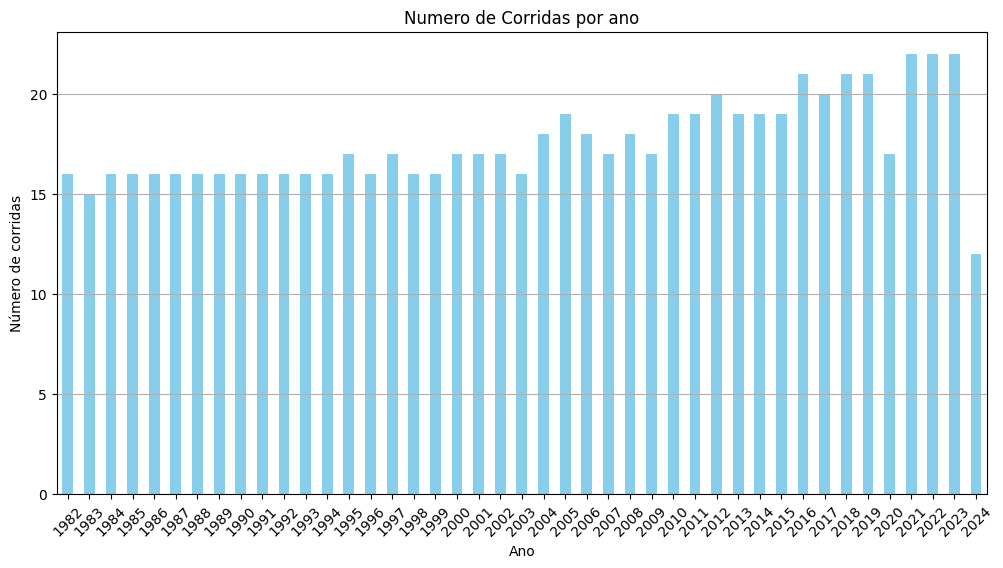

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

races_per_year = df.groupby('year')['raceId'].nunique()

plt.figure(figsize=(12, 6))
races_per_year.plot(kind='bar', color='skyblue')

plt.title('Numero de Corridas por ano')
plt.xlabel('Ano')
plt.ylabel('Número de corridas')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()

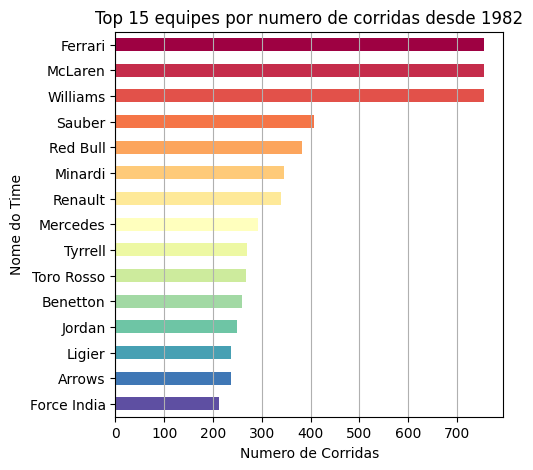

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa os dados por equipe e conta corridas unicas
races_per_team = df.groupby('constructorId')['raceId'].nunique()

# Mapeia o nome das equipes com o id delas
constructor_name_dict = pd.Series(constructors_df.name.values, index=constructors_df.constructorId).to_dict()

# Troca o ID construtor pelo nome do time para visualização
races_per_team.index = races_per_team.index.map(constructor_name_dict)

# Ordena os dados por numero de corridas em ordem decrescente e seleciona as 15 acima
races_per_team_sorted = races_per_team.sort_values(ascending=False).head(15)


plt.figure(figsize=(5,5))
colors = plt.cm.Spectral(np.linspace(0, 1, len(races_per_team_sorted)))
races_per_team_sorted.plot(kind='barh', color=colors)

plt.title('Top 15 equipes por numero de corridas desde 1982')
plt.ylabel('Nome do Time')
plt.xlabel('Numero de Corridas')
plt.grid(axis='x')


plt.gca().invert_yaxis()


plt.show()

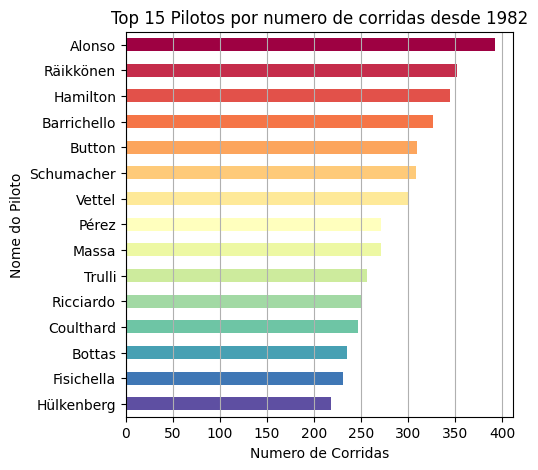

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


races_per_team = df.groupby('driverId')['raceId'].nunique()


driver_name_dict = pd.Series(drivers_df.surname.values, index=drivers_df.driverId).to_dict()


races_per_team.index = races_per_team.index.map(driver_name_dict)


races_per_team_sorted = races_per_team.sort_values(ascending=False).head(15)


plt.figure(figsize=(5, 5))
colors = plt.cm.Spectral(np.linspace(0, 1, len(races_per_team_sorted)))
races_per_team_sorted.plot(kind='barh', color=colors)

plt.title('Top 15 Pilotos por numero de corridas desde 1982')
plt.ylabel('Nome do Piloto')
plt.xlabel('Numero de Corridas')
plt.grid(axis='x')


plt.gca().invert_yaxis()


plt.show()

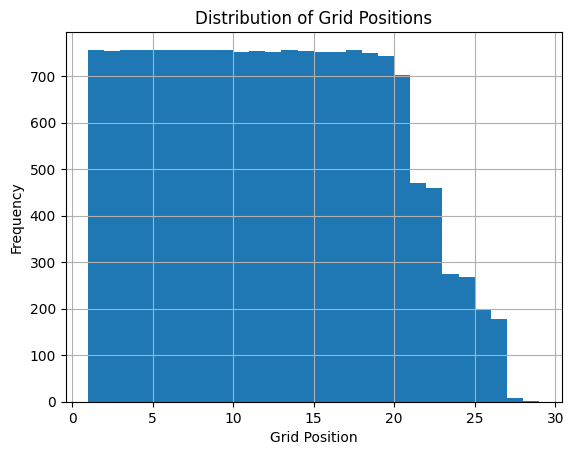

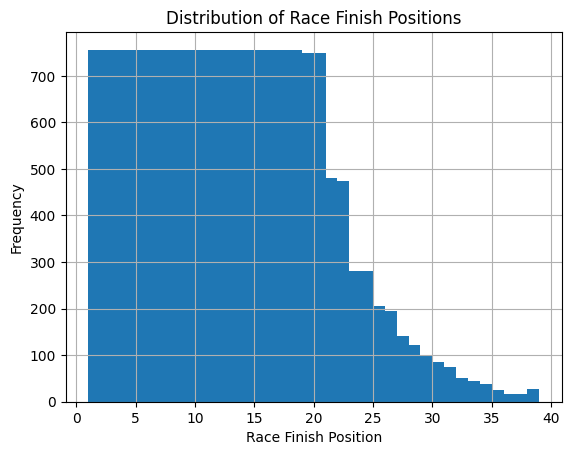

In [ ]:


# Histogram das posições iniciais
df_nonZero = df[df['grid']!=0]
df_nonZero['grid'].hist(bins=28)
plt.title('Distribution of Grid Positions')
plt.xlabel('Grid Position')
plt.ylabel('Frequency')
plt.show()

# Histogram das posições finais
df['positionOrder'].hist(bins=38)
plt.title('Distribution of Race Finish Positions')
plt.xlabel('Race Finish Position')
plt.ylabel('Frequency')
plt.show()


##Criando Variavel de Saida

In [ ]:
# Criando uma coluna pra identificar se o piloto terminou no top 3; 1 é true 0 é false
df['Top 3 Finish'] = df['positionOrder'].le(3).astype(int)


print(df)


numberRace = df["raceId"].nunique()
print(f"Number of unique drivers: {numberRace}")

       raceId  year  round  circuitId  driverId  constructorId  grid  \
0         467  1982      1         30       117              4     5   
1         467  1982      1         30       199              3     8   
2         467  1982      1         30       163              4     1   
3         467  1982      1         30       182              1    13   
4         467  1982      1         30       177              3     7   
...       ...   ...    ...        ...       ...            ...   ...   
17755    1132  2024     12          9       839            214    18   
17756    1132  2024     12          9       815              9     0   
17757    1132  2024     12          9       855             15    14   
17758    1132  2024     12          9       847            131     1   
17759    1132  2024     12          9       842            214    19   

       positionOrder  Top 3 Finish  
0                  1             1  
1                  2             1  
2                  3    

##Criando Colunas de porcentagem

In [ ]:
# numero total de corrida por piloto e numero de top 3
driver_yearly_stats = df.groupby(['year', 'driverId']).agg(
    Total_Races=('raceId', 'nunique'),
    Top_3_Finishes=('Top 3 Finish', 'sum')
).reset_index()

print("Resultados por piloto por ano")
print(driver_yearly_stats)

# Porcentagem de top 3 por ano
driver_yearly_stats['Driver Top 3 Finish Percentage (This Year)'] = (driver_yearly_stats['Top_3_Finishes'] / driver_yearly_stats['Total_Races']) * 100


driver_last_year_stats = driver_yearly_stats.copy()
driver_last_year_stats['year'] += 1
driver_last_year_stats = driver_last_year_stats.rename(columns={'Driver Top 3 Finish Percentage (This Year)': 'Driver Top 3 Finish Percentage (Last Year)'})

df = pd.merge(df, driver_last_year_stats[['year', 'driverId', 'Driver Top 3 Finish Percentage (Last Year)']], on=['year', 'driverId'], how='left')


print("New dataframe")
print(df[df["year"]>=1983])

Resultados por piloto por ano
      year  driverId  Total_Races  Top_3_Finishes
0     1982        90            1               0
1     1982        95           13               1
2     1982       105           16               2
3     1982       110           16               1
4     1982       117           16               4
...    ...       ...          ...             ...
1216  2024       852           12               0
1217  2024       855           12               0
1218  2024       857           12               2
1219  2024       858           11               0
1220  2024       860            1               0

[1221 rows x 4 columns]
New dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       452  1983      1         36       172              3    18   
468       452  1983      1         36      

In [ ]:
# verificando se nao existem valores nulos nos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17760 entries, 0 to 17759
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   raceId                                      17760 non-null  int64  
 1   year                                        17760 non-null  int64  
 2   round                                       17760 non-null  int64  
 3   circuitId                                   17760 non-null  int64  
 4   driverId                                    17760 non-null  int64  
 5   constructorId                               17760 non-null  int64  
 6   grid                                        17760 non-null  int64  
 7   positionOrder                               17760 non-null  int64  
 8   Top 3 Finish                                17760 non-null  int64  
 9   Driver Top 3 Finish Percentage (Last Year)  14056 non-null  float64
dtypes: float64

In [ ]:
#Podemos ver alguns valores NaN na nossa nova coluna, em todos os registros de 1982 teremos o NaN pois nao tem dados anteriores a 82, apos 82, quando encontramos esse NaN são pilotos que não correram no ano passado pela formula 1
print(df[df["year"]>=1982])

       raceId  year  round  circuitId  driverId  constructorId  grid  \
0         467  1982      1         30       117              4     5   
1         467  1982      1         30       199              3     8   
2         467  1982      1         30       163              4     1   
3         467  1982      1         30       182              1    13   
4         467  1982      1         30       177              3     7   
...       ...   ...    ...        ...       ...            ...   ...   
17755    1132  2024     12          9       839            214    18   
17756    1132  2024     12          9       815              9     0   
17757    1132  2024     12          9       855             15    14   
17758    1132  2024     12          9       847            131     1   
17759    1132  2024     12          9       842            214    19   

       positionOrder  Top 3 Finish  Driver Top 3 Finish Percentage (Last Year)  
0                  1             1                    

In [ ]:
# Media da porcentagem de podio dos dois pilotos da equipe
constructor_last_year_stats = df.groupby(['year', 'constructorId', 'round']).agg(
    Sum_Top_3_Finishes_Last_Year=('Driver Top 3 Finish Percentage (Last Year)', 'sum')
).reset_index()

print("Constructor annual stats")
print(constructor_last_year_stats)

# Porcentagem para cada equipe do ano passado
constructor_last_year_stats['Constructor Top 3 Finish Percentage (Last Year)'] = constructor_last_year_stats["Sum_Top_3_Finishes_Last_Year"]/2

df = pd.merge(df, constructor_last_year_stats[['year', 'constructorId', 'round', 'Constructor Top 3 Finish Percentage (Last Year)']], on=['year', 'constructorId', 'round'], how='left')


print("New dataframe")
print(df[df["year"]>=1983])

Constructor annual stats
      year  constructorId  round  Sum_Top_3_Finishes_Last_Year
0     1982              1      1                           0.0
1     1982              1      2                           0.0
2     1982              1      3                           0.0
3     1982              1      5                           0.0
4     1982              1      6                           0.0
...    ...            ...    ...                           ...
9098  2024            215      8                           0.0
9099  2024            215      9                           0.0
9100  2024            215     10                           0.0
9101  2024            215     11                           0.0
9102  2024            215     12                           0.0

[9103 rows x 4 columns]
New dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         3

In [ ]:
# Criando uma função para calcular a porcentagem de chegadas no top 3 antes da rodada atual para os pilotos
def calculate_driver_top_3_percentage_before_round(row, df):
    # Filtrar corridas no mesmo ano, para o mesmo piloto, mas em rodadas anteriores
    previous_races = df[(df['year'] == row['year']) & (df['driverId'] == row['driverId']) & (df['round'] < row['round'])]
    if len(previous_races) == 0:
      return pd.NA

    total_races = previous_races['raceId'].nunique()
    top_3_finishes = previous_races['Top 3 Finish'].sum()

    # Calcular a porcentagem
    return (top_3_finishes / total_races) * 100 if total_races > 0 else pd.NA

# Aplicar a função a cada linha no DataFrame
df['Driver Top 3 Finish Percentage (This Year till last race)'] = df.apply(lambda row: calculate_driver_top_3_percentage_before_round(row, df), axis=1)


In [ ]:
# Calculando a média das porcentagens de chegadas no top 3 para os dois pilotos de cada construtor neste ano
constructor_this_year_stats = df.groupby(['year', 'constructorId', 'round']).agg(
    Sum_Top_3_Finishes_This_Year=('Driver Top 3 Finish Percentage (This Year till last race)', 'sum')
).reset_index()

print("Estatísticas anuais dos construtores")
print(constructor_this_year_stats)

# Calculando a porcentagem de chegadas no top 3 para cada construtor neste ano
constructor_this_year_stats['Constructor Top 3 Finish Percentage (This Year till last race)'] = constructor_this_year_stats["Sum_Top_3_Finishes_This_Year"]/2

df = pd.merge(df, constructor_this_year_stats[['year', 'constructorId', 'round', 'Constructor Top 3 Finish Percentage (This Year till last race)']], on=['year', 'constructorId', 'round'], how='left')

# Verificando os dados mesclados
print("Novo dataframe")
print(df[df["year"]>=1983])


Estatísticas anuais dos construtores
      year  constructorId  round Sum_Top_3_Finishes_This_Year
0     1982              1      1                            0
1     1982              1      2                          0.0
2     1982              1      3                         50.0
3     1982              1      5                    66.666667
4     1982              1      6                         75.0
...    ...            ...    ...                          ...
9098  2024            215      8                          0.0
9099  2024            215      9                          0.0
9100  2024            215     10                          0.0
9101  2024            215     11                          0.0
9102  2024            215     12                          0.0

[9103 rows x 4 columns]
Novo dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         

Media das posições terminadas de cada piloto

In [ ]:
# Calculando o número total de corridas e chegadas no top 3 para cada piloto em cada ano
driver_yearly_stats = df.groupby(['year', 'driverId']).agg(
    Total_Races=('raceId', 'nunique'),
    Avg_position=('positionOrder', 'mean')
).reset_index()

print("Estatísticas anuais dos pilotos")
print(driver_yearly_stats)

# Calculando a porcentagem de chegadas para cada piloto em cada ano
driver_yearly_stats['Driver Avg position (This Year)'] = driver_yearly_stats['Avg_position']

# Deslocando as porcentagens dos pilotos para o ano seguinte, para dados do ano passado
driver_last_year_stats = driver_yearly_stats.copy()
driver_last_year_stats['year'] += 1
driver_last_year_stats = driver_last_year_stats.rename(columns={'Driver Avg position (This Year)': 'Driver Avg position (Last Year)'})

df = pd.merge(df, driver_last_year_stats[['year', 'driverId', 'Driver Avg position (Last Year)']], on=['year', 'driverId'], how='left')


# Verificando os dados mesclados
print("Novo dataframe")
print(df[df["year"]>=1983])


Estatísticas anuais dos pilotos
      year  driverId  Total_Races  Avg_position
0     1982        90            1     30.000000
1     1982        95           13     13.692308
2     1982       105           16      9.000000
3     1982       110           16     14.437500
4     1982       117           16     10.000000
...    ...       ...          ...           ...
1216  2024       852           12     12.250000
1217  2024       855           12     15.333333
1218  2024       857           12      5.750000
1219  2024       858           11     17.272727
1220  2024       860            1      7.000000

[1221 rows x 4 columns]
Novo dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       452  1983      1         36       172              3    18   
468       452  1983      1         36       175              6  

Media das posições terminadas da equipe em cada corrida

In [ ]:
# Calculando a média das porcentagens de chegadas no top 3 para os dois pilotos de cada construtor no ano passado
constructor_last_year_stats = df.groupby(['year', 'constructorId', 'round']).agg(
    sum_position_last_year=('Driver Avg position (Last Year)', 'sum')
).reset_index()

print("Estatísticas anuais dos construtores")
print(constructor_last_year_stats)

# Calculando a porcentagem de chegadas no top 3 para cada construtor no ano passado
constructor_last_year_stats['Constructor Avg position (Last Year)'] = constructor_last_year_stats["sum_position_last_year"]/2

df = pd.merge(df, constructor_last_year_stats[['year', 'constructorId', 'round', 'Constructor Avg position (Last Year)']], on=['year', 'constructorId', 'round'], how='left')

# Verificando os dados mesclados
print("Novo dataframe")
print(df[df["year"]>=1983])


Estatísticas anuais dos construtores
      year  constructorId  round  sum_position_last_year
0     1982              1      1                0.000000
1     1982              1      2                0.000000
2     1982              1      3                0.000000
3     1982              1      5                0.000000
4     1982              1      6                0.000000
...    ...            ...    ...                     ...
9098  2024            215      8               25.896104
9099  2024            215      9               25.896104
9100  2024            215     10               25.896104
9101  2024            215     11               25.896104
9102  2024            215     12               25.896104

[9103 rows x 4 columns]
Novo dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       452  1983    

Media das chegadas das corridas anteriores no mesmo ano para cada piloto

In [ ]:
def calculate_driver_avg_position_before_round(row, df):
    # Filtrar corridas no mesmo ano, para o mesmo piloto, mas em rodadas anteriores
    previous_races = df[(df['year'] == row['year']) & (df['driverId'] == row['driverId']) & (df['round'] < row['round'])]
    if len(previous_races) == 0:
      return pd.NA
    # Calcular o total de corridas e a soma das posições
    total_races = previous_races['raceId'].nunique()
    positionSum = previous_races['positionOrder'].sum()

    # Calcular a posição média
    return (positionSum / total_races) if total_races > 0 else pd.NA

# Aplicar a função a cada linha no DataFrame
df['Driver Average Position (This Year till last race)'] = df.apply(lambda row: calculate_driver_avg_position_before_round(row, df), axis=1)


Media das chegadas das corridas anteriores no mesmo ano para cada equipe

In [ ]:
# Calculando a média das porcentagens de chegadas no top 3 para os dois pilotos de cada construtor neste ano
constructor_this_year_stats = df.groupby(['year', 'constructorId', 'round']).agg(
    sum_Position_Constructor = ('Driver Average Position (This Year till last race)', 'sum')
).reset_index()

print("Estatísticas anuais dos construtores")
print(constructor_this_year_stats)

# Calculando a porcentagem de chegadas no top 3 para cada construtor neste ano
constructor_this_year_stats['Constructor Average Position (This Year till last race)'] = constructor_this_year_stats["sum_Position_Constructor"]/2

df = pd.merge(df, constructor_this_year_stats[['year', 'constructorId', 'round', 'Constructor Average Position (This Year till last race)']], on=['year', 'constructorId', 'round'], how='left')

# Verificando os dados mesclados
print("Novo dataframe")
print(df[df["year"]>=1983])


Estatísticas anuais dos construtores
      year  constructorId  round sum_Position_Constructor
0     1982              1      1                        0
1     1982              1      2                     10.0
2     1982              1      3                     14.5
3     1982              1      5                     12.0
4     1982              1      6                    11.75
...    ...            ...    ...                      ...
9098  2024            215      8                26.857143
9099  2024            215      9                     26.0
9100  2024            215     10                25.555556
9101  2024            215     11                     26.4
9102  2024            215     12                26.090909

[9103 rows x 4 columns]
Novo dataframe
       raceId  year  round  circuitId  driverId  constructorId  grid  \
465       452  1983      1         36       137             34     4   
466       452  1983      1         36       182              1     9   
467       4

In [ ]:
print(df[(df["year"] == 2023)& (df["round"] > 3) ].head(30))

       raceId  year  round  circuitId  driverId  constructorId  grid  \
17141    1101  2023      4         73       815              9     3   
17142    1101  2023      4         73       830              9     2   
17143    1101  2023      4         73       844              6     1   
17144    1101  2023      4         73         4            117     6   
17145    1101  2023      4         73       832              6     4   
17146    1101  2023      4         73         1            131     5   
17147    1101  2023      4         73       840            117     9   
17148    1101  2023      4         73       847            131    11   
17149    1101  2023      4         73       846              1     7   
17150    1101  2023      4         73       852            213     8   
17151    1101  2023      4         73       857              1    10   
17152    1101  2023      4         73       848              3    12   
17153    1101  2023      4         73       825            210  

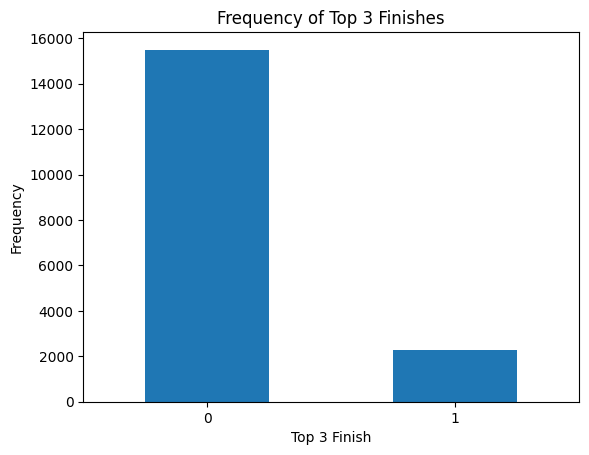

In [ ]:
# Historiograma pra podios
df['Top 3 Finish'].value_counts().plot(kind='bar')
plt.title('Frequency of Top 3 Finishes')
plt.xlabel('Top 3 Finish')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
nan_counts = df.isna().sum()
print(nan_counts)

raceId                                                               0
year                                                                 0
round                                                                0
circuitId                                                            0
driverId                                                             0
constructorId                                                        0
grid                                                                 0
positionOrder                                                        0
Top 3 Finish                                                         0
Driver Top 3 Finish Percentage (Last Year)                        3704
Constructor Top 3 Finish Percentage (Last Year)                      0
Driver Top 3 Finish Percentage (This Year till last race)         1221
Constructor Top 3 Finish Percentage (This Year till last race)       0
Driver Avg position (Last Year)                                   3704
Constr


O os valores NaN na porcentagem de finalizações no Top 3 do ano passado indicam que o piloto não participou no ano passado. O NaN na porcentagem de finalizações no Top 3 do piloto (este ano até a última corrida) indicam que é a primeira corrida do ano ou que  é a primeira corrida do piloto esse ano

Aqui vamos tirar os dados de resultados do data frame para evitar enviesar vazando os dados


In [ ]:
df_final = df.drop(labels=["raceId"], axis=1)

Aqui vamos basicamente retirar os valores nulos do nosso grupo que irá para o modelo, pois nosso modelo não poderá predizer resultados de pilotos em seu primeiro ano ou na sua primeira corrida, ignoramos o ano de 1982 na contagem pois sabemos que nele os valores criados sao nulos pois é o primeiro ano do nossos dados


In [ ]:
print("Number of rows in total:", df_final.shape[0])

# Contas o numero de linhas excluindo o ano de 1982
initial_count = len(df_final[df_final['year'] != 1982])

# Retira os NaN
df_final = df_final.dropna()

# Contas o numero de linhas excluindo o ano de 1982 depois de retirarmos os valores nulos
final_count = len(df_final[df_final['year'] != 1982])

# calculo do numero de linhas excluidas
rows_dropped = initial_count - final_count

print("Numero de linhas excluidas:", rows_dropped)
df_final_keepPositionOrder = df_final.copy()
df_final = df_final.drop(["positionOrder"], axis = 1)
print(df_final)

Number of rows in total: 17760
Numero de linhas excluidas: 4124
       year  round  circuitId  driverId  constructorId  grid  Top 3 Finish  \
493    1983      2         43       187              1    22             1   
494    1983      2         43       182              1    23             1   
495    1983      2         43       163              6     2             1   
496    1983      2         43       172              3     4             0   
497    1983      2         43       176             21    16             0   
...     ...    ...        ...       ...            ...   ...           ...   
17755  2024     12          9       839            214    18             0   
17756  2024     12          9       815              9     0             0   
17757  2024     12          9       855             15    14             0   
17758  2024     12          9       847            131     1             0   
17759  2024     12          9       842            214    19             0   


#Analise Exploratoria

In [ ]:
df_final["Driver Top 3 Finish Percentage (This Year till last race)"] = df_final["Driver Top 3 Finish Percentage (This Year till last race)"].astype(float)
df_final["Constructor Top 3 Finish Percentage (This Year till last race)"] = df_final["Constructor Top 3 Finish Percentage (This Year till last race)"].astype(float)
df_final["Driver Average Position (This Year till last race)"] = df_final["Driver Average Position (This Year till last race)"].astype(float)
df_final["Constructor Average Position (This Year till last race)"] = df_final["Constructor Average Position (This Year till last race)"].astype(float)

In [ ]:

description = df_final.describe()
selected_description = description.loc[['count', 'mean', 'std', 'min', 'max']]

print(selected_description)

               year         round     circuitId      driverId  constructorId  \
count  13171.000000  13171.000000  13171.000000  13171.000000   13171.000000   
mean    2003.073191      9.793638     20.221471    228.313416      35.559715   
std       12.461596      4.971300     18.387368    314.354383      56.317275   
min     1983.000000      2.000000      1.000000      1.000000       1.000000   
max     2024.000000     22.000000     80.000000    858.000000     215.000000   

               grid  Top 3 Finish  Driver Top 3 Finish Percentage (Last Year)  \
count  13171.000000  13171.000000                                13171.000000   
mean      10.470352      0.153064                                   14.962249   
std        6.694886      0.360062                                   22.648261   
min        0.000000      0.000000                                    0.000000   
max       29.000000      1.000000                                  100.000000   

       Constructor Top 3 Finish 

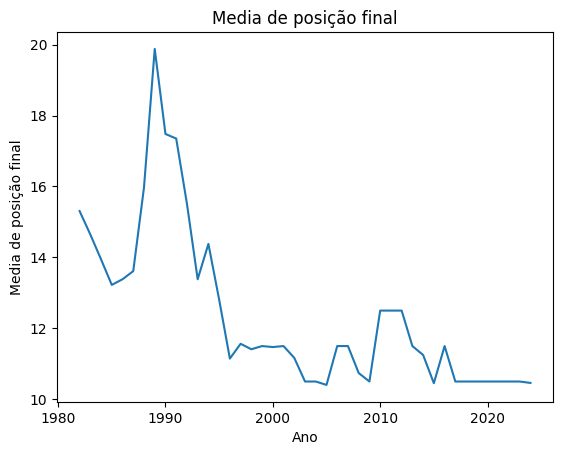

In [ ]:
avg_finish_per_year = df.groupby('year')['positionOrder'].mean()
avg_finish_per_year.plot(kind='line')
plt.title('Media de posição final')
plt.xlabel('Ano')
plt.ylabel('Media de posição final')
plt.show()

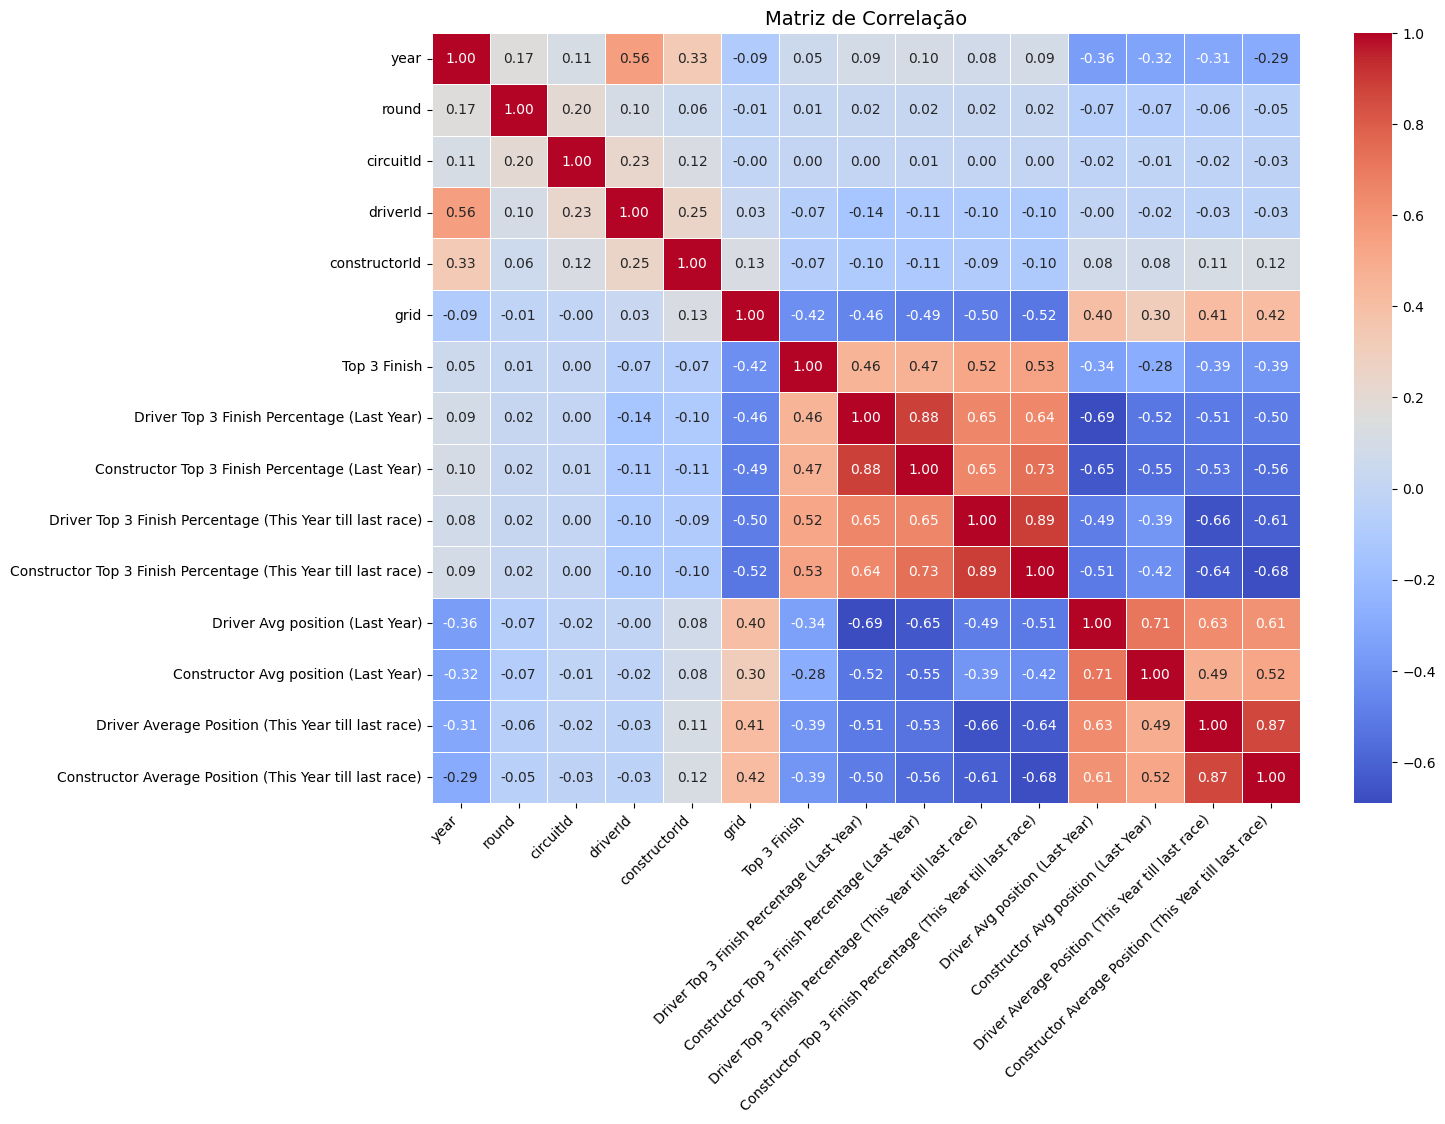

In [ ]:
plt.figure(figsize=(14,10))  # Aumenta o tamanho da figura para melhorar a legibilidade
sns.heatmap(
    df_final.corr(),
    annot=True,
    mask=False,
    annot_kws={"size": 10},  # Aumenta o tamanho dos números anotados
    cmap="coolwarm",  # Troca o esquema de cores para um mais legível
    fmt=".2f",  # Mostra apenas dois dígitos decimais
    linewidths=0.5  # Adiciona linhas entre os quadrados para facilitar a visualização
)

# Ajusta os rótulos dos eixos
plt.xticks(rotation=45, fontsize=10, ha="right")  # Inclina os rótulos do eixo x
plt.yticks(fontsize=10)  # Ajusta o tamanho dos rótulos do eixo y

plt.title("Matriz de Correlação", fontsize=14)  # Adiciona um título
plt.show()


Podemos observar que o percentual de top 3, tanto para pilotos quanto para construtores (equipes) no ano anterior e no ano atual, tem fortes correlações positivas com a variável alvo Top 3 Finish, que indica se o piloto termina entre os três primeiros nesta corrida. Os valores dessas correlaçõessão respectivamente 0,46 e 0,53.

Além disso, o grid (posição de largada do piloto nesta corrida) e as posições médias de chegada para pilotos e equipes no ano atual e no anterior apresentam correlações negativas com a variável alvo Top 3 Finish. Isso é esperado, pois, quando a posição de largada ou a posição média de chegada tem um valor mais alto, é menos provável que o carro termine entre os três primeiros.

Ademais, várias características derivadas mostram algum grau de correlação. Por exemplo, a correlação entre 'Percentual de Top 3 do Piloto (Ano Passado)' e 'Percentual de Top 3 do Piloto (Este Ano até a última corrida)' é de 0,65. Mas, como elas não estão próximas de uma correlação perfeita, incluir uma característica adicional ainda tem o potencial de melhorar nosso modelo de classificação.

In [ ]:
correlations = df_final.corr()['Top 3 Finish'].sort_values(ascending=False)

# Display
print(correlations)

Top 3 Finish                                                      1.000000
Constructor Top 3 Finish Percentage (This Year till last race)    0.531223
Driver Top 3 Finish Percentage (This Year till last race)         0.523979
Constructor Top 3 Finish Percentage (Last Year)                   0.465248
Driver Top 3 Finish Percentage (Last Year)                        0.457875
year                                                              0.053939
round                                                             0.014848
circuitId                                                         0.003733
driverId                                                         -0.068275
constructorId                                                    -0.070372
Constructor Avg position (Last Year)                             -0.276158
Driver Avg position (Last Year)                                  -0.340637
Driver Average Position (This Year till last race)               -0.387256
Constructor Average Posit

One Hot Enconding

In [ ]:
df_final_encoded = pd.get_dummies(df_final, columns=['circuitId', 'driverId', 'constructorId'])

# cria uma lista de colunas, excluindo a que será movida
cols = [col for col in df_final_encoded.columns if col != 'Top 3 Finish']

# Adicione a coluna ao final do DataFrame
df_final_encoded = df_final_encoded[cols + ['Top 3 Finish']]

print(df_final_encoded)
print(df_final_encoded.shape)
#df_final_encoded.to_csv('tabela_gpt.csv', index=False)

       year  round  grid  Driver Top 3 Finish Percentage (Last Year)  \
493    1983      2    22                                   33.333333   
494    1983      2    23                                   21.428571   
495    1983      2     2                                   25.000000   
496    1983      2     4                                    6.666667   
497    1983      2    16                                    0.000000   
...     ...    ...   ...                                         ...   
17755  2024     12    18                                    4.545455   
17756  2024     12     0                                   40.909091   
17757  2024     12    14                                    0.000000   
17758  2024     12     1                                    9.090909   
17759  2024     12    19                                    4.545455   

       Constructor Top 3 Finish Percentage (Last Year)  \
493                                          27.380952   
494                

# Testes


## Experiência 1
Na Experiência 1, começamos com o modelo mais simples para observar o desempenho dos modelos de ciência de dados. Nesse modelo, além de ano, rodada, circuito, construtor e corrida, consideramos apenas duas características adicionais (os percentuais de término no top 3 do ano anterior para os pilotos e para os construtores).








In [ ]:
df_1 = df_final_encoded.drop(["grid", "Driver Top 3 Finish Percentage (This Year till last race)",
"Constructor Top 3 Finish Percentage (This Year till last race)", "Driver Average Position (This Year till last race)",
"Constructor Average Position (This Year till last race)", "Constructor Avg position (Last Year)",
"Driver Avg position (Last Year)"], axis = 1)


from sklearn.preprocessing import StandardScaler

train_df = df_1[(df_1["year"] >= 1983) & (df_1["year"] <= 2008)]
test_df = df_1[(df_1["year"] >= 2009) & (df_1["year"] <= 2024)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

df_1.columns

Index(['year', 'round', 'Driver Top 3 Finish Percentage (Last Year)',
       'Constructor Top 3 Finish Percentage (Last Year)', 'circuitId_1',
       'circuitId_2', 'circuitId_3', 'circuitId_4', 'circuitId_5',
       'circuitId_6',
       ...
       'constructorId_206', 'constructorId_207', 'constructorId_208',
       'constructorId_209', 'constructorId_210', 'constructorId_211',
       'constructorId_213', 'constructorId_214', 'constructorId_215',
       'Top 3 Finish'],
      dtype='object', length=309)

Model: LogisticRegression
Test AUC-ROC for LogisticRegression: 0.6931
Test Recall for LogisticRegression: 0.0473
Test F1 Score for LogisticRegression: 0.0832

Model: RandomForestClassifier
Test AUC-ROC for RandomForestClassifier: 0.8023
Test Recall for RandomForestClassifier: 0.1085
Test F1 Score for RandomForestClassifier: 0.1614

Model: XGBoost
Test AUC-ROC for XGBoost: 0.8123
Test Recall for XGBoost: 0.3106
Test F1 Score for XGBoost: 0.3797

Model: LogisticRegression, AUC-ROC: 0.6931, Recall: 0.0473, F1 Score: 0.0832, Accuracy: 0.8226
Model: RandomForestClassifier, AUC-ROC: 0.8023, Recall: 0.1085, F1 Score: 0.1614, Accuracy: 0.8081
Model: XGBoost, AUC-ROC: 0.8123, Recall: 0.3106, F1 Score: 0.3797, Accuracy: 0.8273


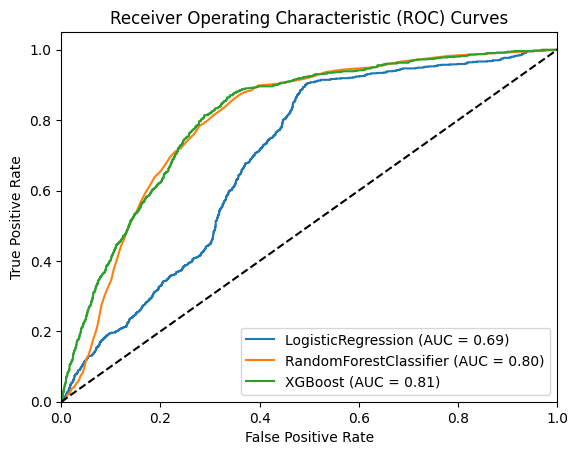

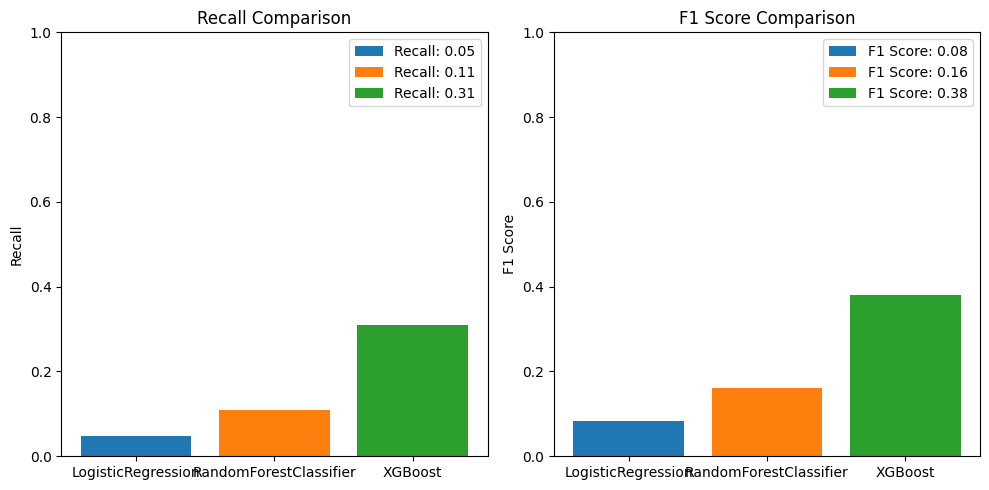

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, recall_score, f1_score
import matplotlib.pyplot as plt

# Dicionário para armazenar as métricas dos modelos
model_accuracy_info = {}

# Inicializa os modelos com os parâmetros padrão
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Avaliar cada modelo
for name, model in models.items():
    print(f"Model: {name}")

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Prever nos dados de teste
    pred_test_prob = model.predict_proba(X_test)
    pred_test = model.predict(X_test)

    # Calcular métricas: AUC-ROC, acurácia, recall e F1 Score
    auc_test = roc_auc_score(y_test, pred_test_prob[:, 1])
    accuracy_test = accuracy_score(y_test, pred_test)
    recall_test = recall_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V1.joblib"
    joblib.dump(model, model_filename)

    # Armazenar as métricas no dicionário
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, _ = roc_curve(y_test, pred_test_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Imprimir as métricas de cada modelo
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, AUC-ROC: {info['auc_roc']:.4f}, Recall: {info['recall']:.4f}, F1 Score: {info['f1_score']:.4f}, Accuracy: {info['accuracy']:.4f}")

# Adicionar uma linha diagonal tracejada no gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Plotar gráficos para Recall e F1 Score
plt.figure(figsize=(10, 5))

# Gráfico de Recall
plt.subplot(1, 2, 1)
for model_name, info in model_accuracy_info.items():
    plt.bar(model_name, info['recall'], label=f'Recall: {info["recall"]:.2f}')
plt.ylim([0.0, 1.0])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.legend()

# Gráfico de F1 Score
plt.subplot(1, 2, 2)
for model_name, info in model_accuracy_info.items():
    plt.bar(model_name, info['f1_score'], label=f'F1 Score: {info["f1_score"]:.2f}')
plt.ylim([0.0, 1.0])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


## Experiência 2

Experimento 2: Agora adicionamos duas novas características: as porcentagens de finalização no top 3 deste ano até a última corrida para pilotos e para construtores.

In [ ]:
df_2 = df_final_encoded.drop(["grid", "Driver Average Position (This Year till last race)", "Constructor Average Position (This Year till last race)", "Constructor Avg position (Last Year)",
"Driver Avg position (Last Year)"], axis = 1)
print(df_2.shape)
from sklearn.preprocessing import StandardScaler

train_df = df_2[(df_2["year"] >= 1983) & (df_2["year"] <= 2008)]
test_df = df_2[(df_2["year"] >= 2009) & (df_2["year"] <= 2024)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

(13171, 311)


In [ ]:
print(df_2.shape)

(13171, 311)


Model: LogisticRegression
Test AUC-ROC for LogisticRegression: 0.8703
Test Recall for LogisticRegression: 0.2748
Test F1 Score for LogisticRegression: 0.3924

Model: RandomForestClassifier
Test AUC-ROC for RandomForestClassifier: 0.8496
Test Recall for RandomForestClassifier: 0.2125
Test F1 Score for RandomForestClassifier: 0.2987

Model: XGBoost
Test AUC-ROC for XGBoost: 0.8014
Test Recall for XGBoost: 0.3152
Test F1 Score for XGBoost: 0.3630

Model: LogisticRegression, AUC-ROC: 0.8703, Recall: 0.2748, F1 Score: 0.3924, Accuracy: 0.8552
Model: RandomForestClassifier, AUC-ROC: 0.8496, Recall: 0.2125, F1 Score: 0.2987, Accuracy: 0.8303
Model: XGBoost, AUC-ROC: 0.8014, Recall: 0.3152, F1 Score: 0.3630, Accuracy: 0.8118


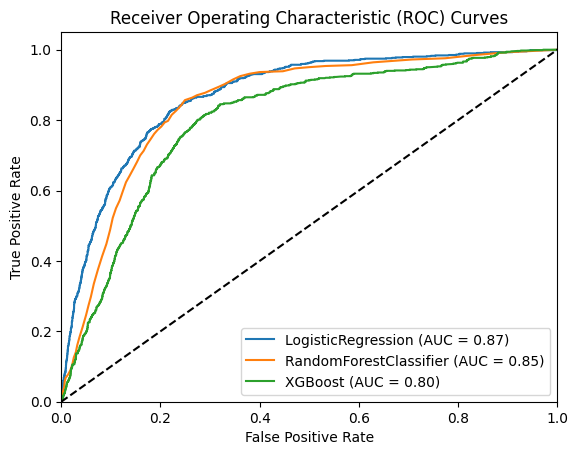

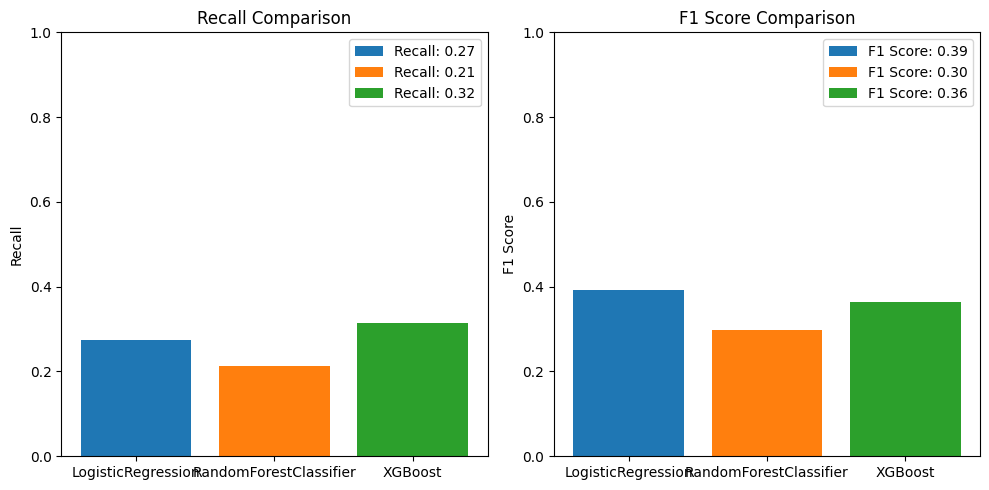

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, recall_score, f1_score
import matplotlib.pyplot as plt

# Dicionário para armazenar as métricas dos modelos
model_accuracy_info = {}

# Inicializa os modelos com os parâmetros padrão
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Avaliar cada modelo
for name, model in models.items():
    print(f"Model: {name}")

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Prever nos dados de teste
    pred_test_prob = model.predict_proba(X_test)
    pred_test = model.predict(X_test)

    # Calcular métricas: AUC-ROC, acurácia, recall e F1 Score
    auc_test = roc_auc_score(y_test, pred_test_prob[:, 1])
    accuracy_test = accuracy_score(y_test, pred_test)
    recall_test = recall_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V1.joblib"
    joblib.dump(model, model_filename)

    # Armazenar as métricas no dicionário
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, _ = roc_curve(y_test, pred_test_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Imprimir as métricas de cada modelo
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, AUC-ROC: {info['auc_roc']:.4f}, Recall: {info['recall']:.4f}, F1 Score: {info['f1_score']:.4f}, Accuracy: {info['accuracy']:.4f}")

# Adicionar uma linha diagonal tracejada no gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Plotar gráficos para Recall e F1 Score
plt.figure(figsize=(10, 5))

# Gráfico de Recall
plt.subplot(1, 2, 1)
for model_name, info in model_accuracy_info.items():
    plt.bar(model_name, info['recall'], label=f'Recall: {info["recall"]:.2f}')
plt.ylim([0.0, 1.0])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.legend()

# Gráfico de F1 Score
plt.subplot(1, 2, 2)
for model_name, info in model_accuracy_info.items():
    plt.bar(model_name, info['f1_score'], label=f'F1 Score: {info["f1_score"]:.2f}')
plt.ylim([0.0, 1.0])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


##Experiência 3

Experimento 3: Agora adicionamos quatro novas características: posição média de chegada dos pilotos e construtores no ano passado, posição média de chegada dos pilotos e construtores deste ano até a última corrida.

In [ ]:
df_3 = df_final_encoded.drop(["grid"], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

train_df = df_3[(df_3["year"] >= 1983) & (df_3["year"] <= 2008)]
test_df = df_3[(df_3["year"] >= 2009) & (df_3["year"] <= 2024)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

Model: LogisticRegression
Test AUC-ROC for LogisticRegression: 0.8948
Test Recall for LogisticRegression: 0.4630
Test F1 Score for LogisticRegression: 0.5332

Model: RandomForestClassifier
Test AUC-ROC for RandomForestClassifier: 0.8642
Test Recall for RandomForestClassifier: 0.2148
Test F1 Score for RandomForestClassifier: 0.3077

Model: XGBoost
Test AUC-ROC for XGBoost: 0.8283
Test Recall for XGBoost: 0.2598
Test F1 Score for XGBoost: 0.3316

Model: LogisticRegression, AUC-ROC: 0.8948, Recall: 0.4630, F1 Score: 0.5332, Accuracy: 0.8621
Model: RandomForestClassifier, AUC-ROC: 0.8642, Recall: 0.2148, F1 Score: 0.3077, Accuracy: 0.8356
Model: XGBoost, AUC-ROC: 0.8283, Recall: 0.2598, F1 Score: 0.3316, Accuracy: 0.8218


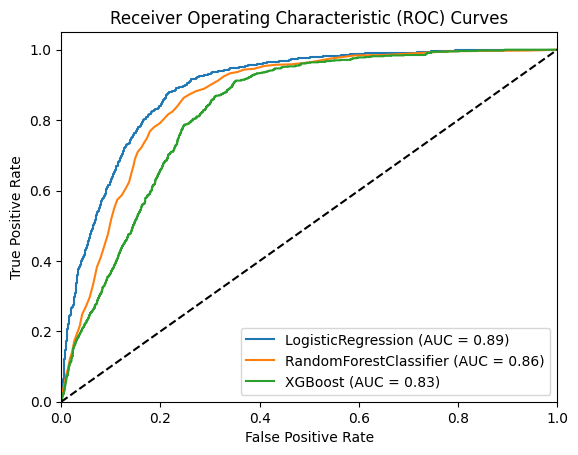

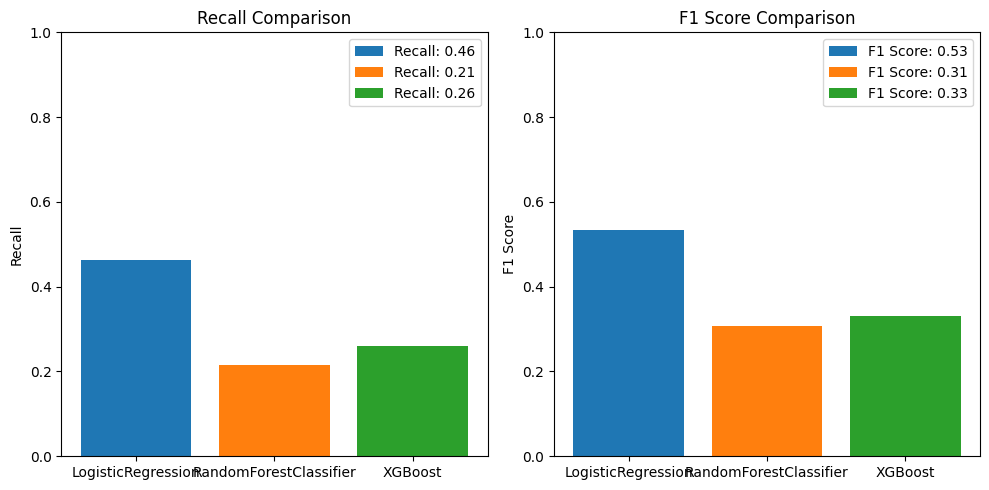

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, recall_score, f1_score
import matplotlib.pyplot as plt

# Dicionário para armazenar as métricas dos modelos
model_accuracy_info = {}

# Inicializa os modelos com os parâmetros padrão
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Avaliar cada modelo
for name, model in models.items():
    print(f"Model: {name}")

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Prever nos dados de teste
    pred_test_prob = model.predict_proba(X_test)
    pred_test = model.predict(X_test)

    # Calcular métricas: AUC-ROC, acurácia, recall e F1 Score
    auc_test = roc_auc_score(y_test, pred_test_prob[:, 1])
    accuracy_test = accuracy_score(y_test, pred_test)
    recall_test = recall_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V1.joblib"
    joblib.dump(model, model_filename)

    # Armazenar as métricas no dicionário
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, _ = roc_curve(y_test, pred_test_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Imprimir as métricas de cada modelo
for model_name, info in model_accuracy_info.items():
    print(f"Model: {model_name}, AUC-ROC: {info['auc_roc']:.4f}, Recall: {info['recall']:.4f}, F1 Score: {info['f1_score']:.4f}, Accuracy: {info['accuracy']:.4f}")

# Adicionar uma linha diagonal tracejada no gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Plotar gráficos para Recall e F1 Score
plt.figure(figsize=(10, 5))

# Gráfico de Recall
plt.subplot(1, 2, 1)
for model_name, info in model_accuracy_info.items():
    plt.bar(model_name, info['recall'], label=f'Recall: {info["recall"]:.2f}')
plt.ylim([0.0, 1.0])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.legend()

# Gráfico de F1 Score
plt.subplot(1, 2, 2)
for model_name, info in model_accuracy_info.items():
    plt.bar(model_name, info['f1_score'], label=f'F1 Score: {info["f1_score"]:.2f}')
plt.ylim([0.0, 1.0])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


##Experiência 4

Testando Agora adicionando a caracteristica que registra o resultado da classificação feita pelo piloto (a posição entre os 20 em que o piloto iniciara a corrida)

In [ ]:
df_with_qualifying = df_final_encoded

In [ ]:
from sklearn.preprocessing import StandardScaler

train_df = df_with_qualifying[(df_with_qualifying["year"] >= 1983) & (df_with_qualifying["year"] <= 2008)]
test_df = df_with_qualifying[(df_with_qualifying["year"] >= 2009) & (df_with_qualifying["year"] <= 2024)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values



Model: LogisticRegression
Test AUC-ROC for LogisticRegression: 0.9202
Test Recall for LogisticRegression: 0.5543
Test F1 Score for LogisticRegression: 0.6088

Model: RandomForestClassifier
Test AUC-ROC for RandomForestClassifier: 0.9105
Test Recall for RandomForestClassifier: 0.4619
Test F1 Score for RandomForestClassifier: 0.5525

Model: XGBoost
Test AUC-ROC for XGBoost: 0.9049
Test Recall for XGBoost: 0.5219
Test F1 Score for XGBoost: 0.5740



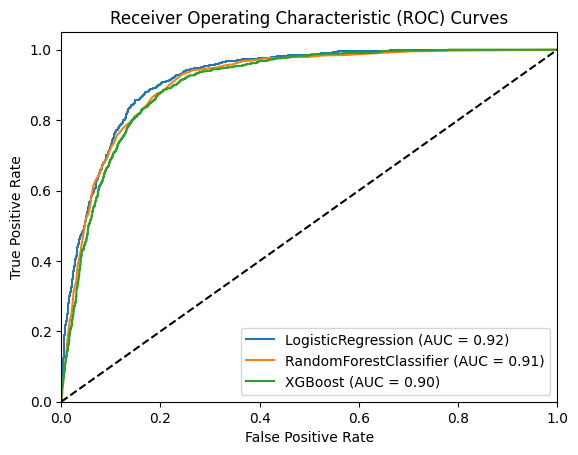

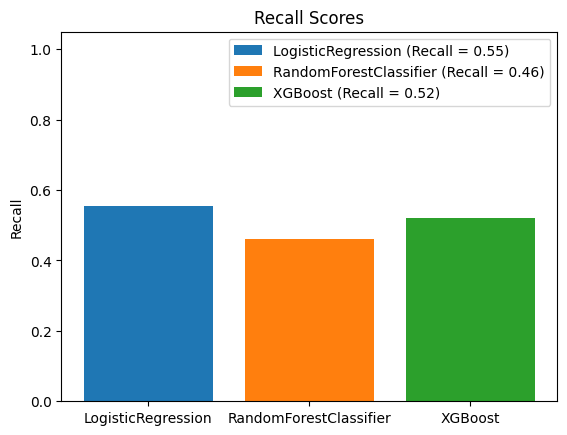

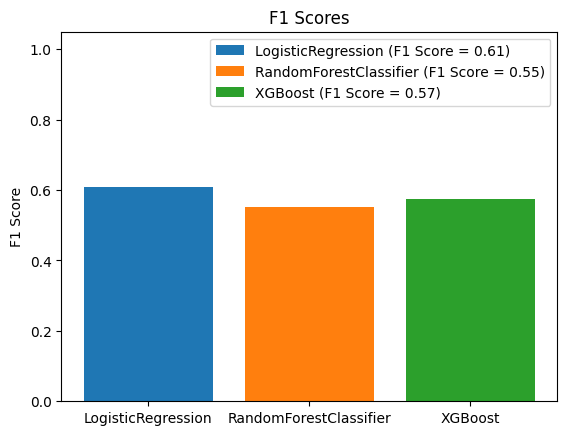

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dicionário para armazenar o melhor modelo e a acurácia de teste para cada algoritmo
model_accuracy_info = {}

# Inicializa os modelos com os parâmetros padrão
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Avaliar cada modelo
for name, model in models.items():
    print(f"Model: {name}")

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Prever e avaliar nos dados de teste usando AUC-ROC, Recall e F1 Score
    pred_test = model.predict_proba(X_test)
    pred_labels = model.predict(X_test)

    # Calcular AUC-ROC
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    accuracy_test = accuracy_score(y_test, pred_labels)  # Calcular acurácia
    recall_test = recall_score(y_test, pred_labels)  # Calcular Recall
    f1_test = f1_score(y_test, pred_labels)  # Calcular F1 Score

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V1.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Armazenar AUC-ROC
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Adicionar uma linha diagonal tracejada para ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Recall para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['recall'], label=f'{name} (Recall = {info["recall"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('Recall Scores')
plt.ylabel('Recall')
plt.legend(loc="upper right")
plt.show()

# Gráfico de F1 Score para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['f1_score'], label=f'{name} (F1 Score = {info["f1_score"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('F1 Scores')
plt.ylabel('F1 Score')
plt.legend(loc="upper right")
plt.show()


##Experiência 5

Retirando posição media

In [ ]:
df_5 = df_final_encoded.drop(["Driver Average Position (This Year till last race)", "Constructor Average Position (This Year till last race)", "Constructor Avg position (Last Year)",
"Driver Avg position (Last Year)"], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

train_df = df_with_qualifying[(df_with_qualifying["year"] >= 1983) & (df_with_qualifying["year"] <= 2008)]
test_df = df_with_qualifying[(df_with_qualifying["year"] >= 2009) & (df_with_qualifying["year"] <= 2024)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values



Model: LogisticRegression
Test AUC-ROC for LogisticRegression: 0.9202
Test Recall for LogisticRegression: 0.5543
Test F1 Score for LogisticRegression: 0.6088

Model: RandomForestClassifier
Test AUC-ROC for RandomForestClassifier: 0.9112
Test Recall for RandomForestClassifier: 0.4538
Test F1 Score for RandomForestClassifier: 0.5551

Model: XGBoost
Test AUC-ROC for XGBoost: 0.9049
Test Recall for XGBoost: 0.5219
Test F1 Score for XGBoost: 0.5740



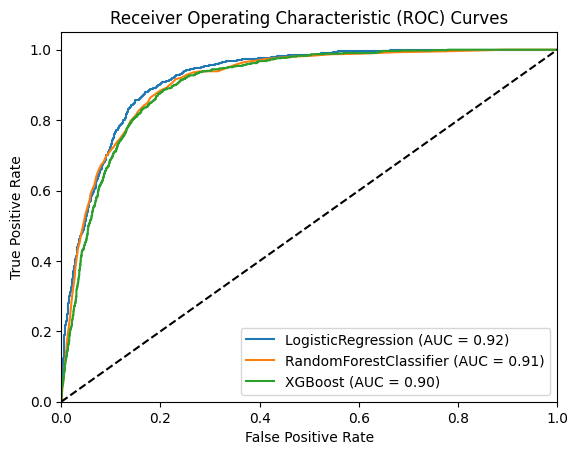

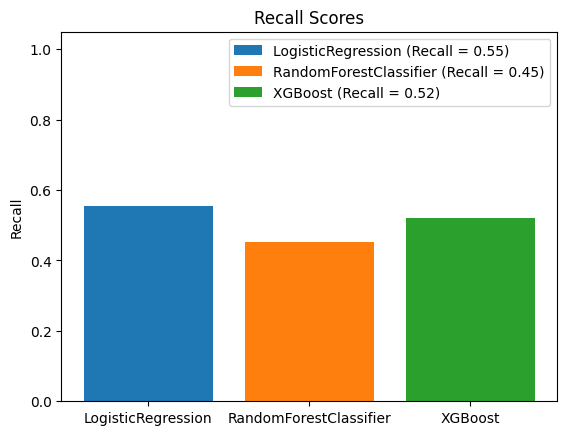

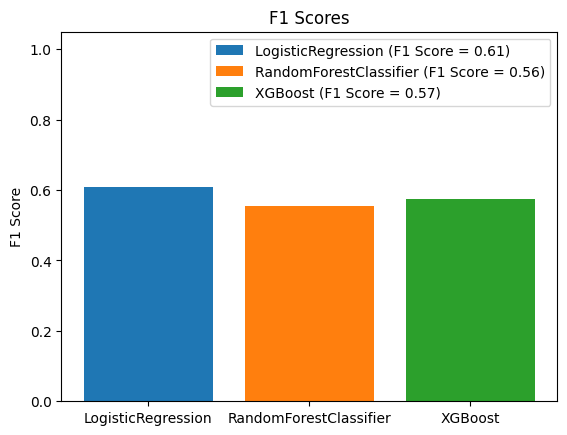

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dicionário para armazenar o melhor modelo e a acurácia de teste para cada algoritmo
model_accuracy_info = {}

# Inicializa os modelos com os parâmetros padrão
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Avaliar cada modelo
for name, model in models.items():
    print(f"Model: {name}")

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Prever e avaliar nos dados de teste usando AUC-ROC, Recall e F1 Score
    pred_test = model.predict_proba(X_test)
    pred_labels = model.predict(X_test)

    # Calcular AUC-ROC
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    accuracy_test = accuracy_score(y_test, pred_labels)  # Calcular acurácia
    recall_test = recall_score(y_test, pred_labels)  # Calcular Recall
    f1_test = f1_score(y_test, pred_labels)  # Calcular F1 Score

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V1.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Armazenar AUC-ROC
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Adicionar uma linha diagonal tracejada para ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Recall para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['recall'], label=f'{name} (Recall = {info["recall"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('Recall Scores')
plt.ylabel('Recall')
plt.legend(loc="upper right")
plt.show()

# Gráfico de F1 Score para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['f1_score'], label=f'{name} (F1 Score = {info["f1_score"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('F1 Scores')
plt.ylabel('F1 Score')
plt.legend(loc="upper right")
plt.show()


##Normalizando os dados

Agora vamos realizar um teste normalizando os dados

In [ ]:
df_with_qualifying = df_final_encoded

In [ ]:
from sklearn.preprocessing import StandardScaler

train_df = df_with_qualifying[(df_with_qualifying["year"] >= 1983) & (df_with_qualifying["year"] <= 2008)]
test_df = df_with_qualifying[(df_with_qualifying["year"] >= 2009) & (df_with_qualifying["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values


scaler = StandardScaler()

# Ajustar o scaler apenas nos dados de treino e aplicar a transformação em treino, validação e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model: LogisticRegression
Test AUC-ROC for LogisticRegression: 0.8578
Test Recall for LogisticRegression: 0.2425
Test F1 Score for LogisticRegression: 0.3462

Model: RandomForestClassifier
Test AUC-ROC for RandomForestClassifier: 0.9098
Test Recall for RandomForestClassifier: 0.4526
Test F1 Score for RandomForestClassifier: 0.5496

Model: XGBoost
Test AUC-ROC for XGBoost: 0.9030
Test Recall for XGBoost: 0.5114
Test F1 Score for XGBoost: 0.5669



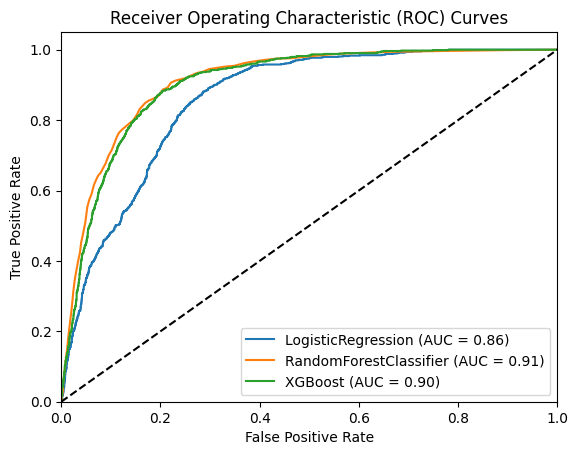

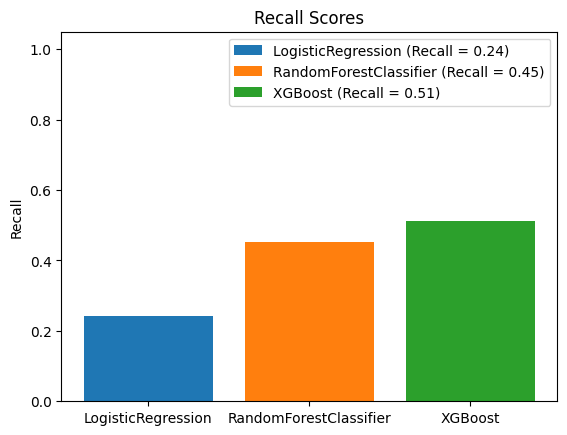

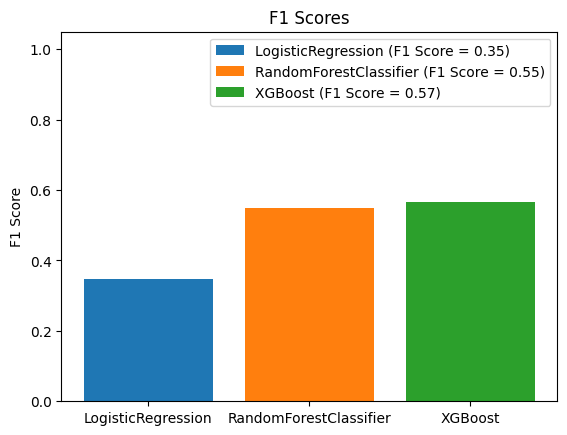

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dicionário para armazenar o melhor modelo e a acurácia de teste para cada algoritmo
model_accuracy_info = {}

# Inicializa os modelos com os parâmetros padrão
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Avaliar cada modelo
for name, model in models.items():
    print(f"Model: {name}")

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Prever e avaliar nos dados de teste usando AUC-ROC
    pred_test = model.predict_proba(X_test)
    pred_labels = model.predict(X_test)

    # Calcular AUC-ROC
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    accuracy_test = accuracy_score(y_test, pred_labels)  # Calcular acurácia
    recall_test = recall_score(y_test, pred_labels)  # Calcular Recall
    f1_test = f1_score(y_test, pred_labels)  # Calcular F1 Score

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V1.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,  # Armazenar AUC-ROC
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Adicionar uma linha diagonal tracejada para o gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Recall para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['recall'], label=f'{name} (Recall = {info["recall"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('Recall Scores')
plt.ylabel('Recall')
plt.legend(loc="upper right")
plt.show()

# Gráfico de F1 Score para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['f1_score'], label=f'{name} (F1 Score = {info["f1_score"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('F1 Scores')
plt.ylabel('F1 Score')
plt.legend(loc="upper right")
plt.show()


##Testando com Ajuste de HiperParametros

In [ ]:
df_with_qualifying = df_final_encoded

In [ ]:
from sklearn.preprocessing import StandardScaler

train_df = df_with_qualifying[(df_with_qualifying["year"] >= 1983) & (df_with_qualifying["year"] <= 2008)]
val_df = df_with_qualifying[(df_with_qualifying["year"] >= 2009) & (df_with_qualifying["year"] <= 2016)]
test_df = df_with_qualifying[(df_with_qualifying["year"] >= 2017) & (df_with_qualifying["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 1.0, 'random_state': None}
Test AUC-ROC for LogisticRegression: 0.9224
Test Recall for LogisticRegression: 0.6127
Test F1 Score for LogisticRegression: 0.6410

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 50, 'random_state': 42}
Test AUC-ROC for RandomForestClassifier: 0.9222
Test Recall for RandomForestClassifier: 0.5343
Test F1 Score for RandomForestClassifier: 0.6124

Model: XGBoost
Best parameters for XGBoost: {'max_depth': 3, 'n_estimators': 50, 'random_state': None}
Test AUC-ROC for XGBoost: 0.8953
Test Recall for XGBoost: 0.5196
Test F1 Score for XGBoost: 0.5938



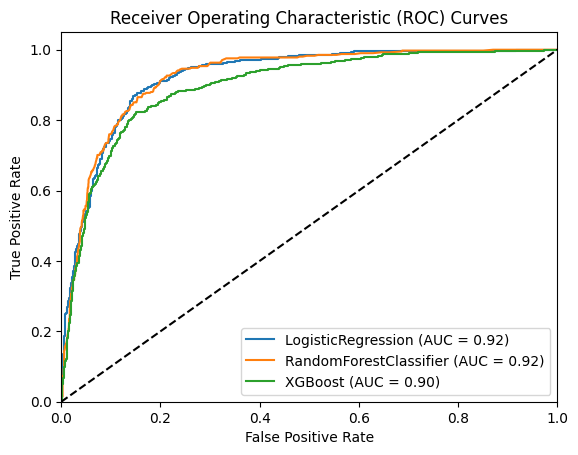

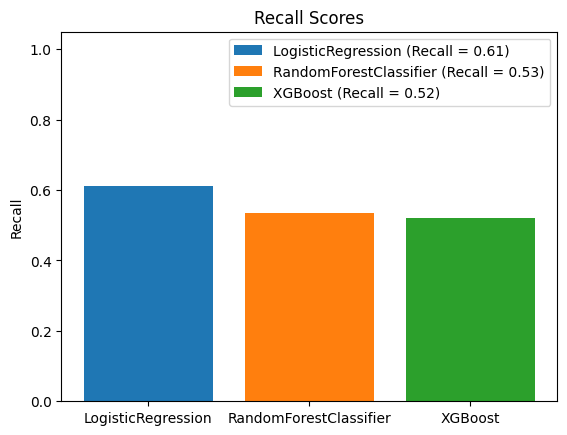

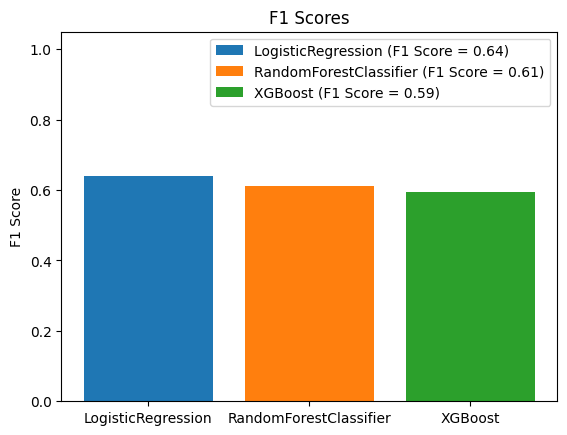

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

# Dicionário para armazenar o melhor modelo e a acurácia de teste para cada algoritmo
model_accuracy_info = {}

# Definir a grade de hiperparâmetros mais diversificada para cada modelo
param_grid = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1.0, 10.0],            # Controla regularização
        'random_state': [None, 42]                            # Definindo random_state para reprodutibilidade
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200, 500],            # Variação no número de árvores
        'max_depth': [None, 10, 20, 30, 50],            # Diversas profundidades máximas
        'random_state': [None, 42]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [3, 6, 10, 15],
        'random_state': [None, 42]
    }
}

# Inicializar os modelos
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Função para ajustar hiperparâmetros manualmente
def tune_hyperparameters(model, params, X_train, y_train, X_val, y_val, weights=(0.5, 0.25, 0.25)):
    best_model = None
    best_params = {}
    best_score = 0  # Usar a pontuação ponderada
    for param in ParameterGrid(params):
        model.set_params(**param)
        model.fit(X_train, y_train)

        # Previsões de probabilidade e rótulos para calcular as métricas
        probabilities = model.predict_proba(X_val)[:, 1]
        pred_labels = model.predict(X_val)

        # Calcular as métricas
        auc = roc_auc_score(y_val, probabilities)
        recall = recall_score(y_val, pred_labels)
        f1 = f1_score(y_val, pred_labels)

        # Pontuação ponderada
        weighted_score = weights[0] * auc + weights[0] * recall + weights[0] * f1

        # Atualizar o melhor modelo se a pontuação ponderada melhorar
        if weighted_score > best_score:
            best_score = weighted_score
            best_model = model
            best_params = param

    return best_model, best_params

# Ajuste de hiperparâmetros e avaliação
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Ajustar hiperparâmetros
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Prever e avaliar nos dados de teste usando AUC-ROC, acurácia, recall e F1 Score
    pred_test = model.predict_proba(X_test)
    pred_labels = model.predict(X_test)

    # Calcular métricas
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calcular AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_labels)  # Calcular acurácia
    recall_test = recall_score(y_test, pred_labels)  # Calcular Recall
    f1_test = f1_score(y_test, pred_labels)  # Calcular F1 Score

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V4.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Adicionar uma linha diagonal tracejada para o gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Recall para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['recall'], label=f'{name} (Recall = {info["recall"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('Recall Scores')
plt.ylabel('Recall')
plt.legend(loc="upper right")
plt.show()

# Gráfico de F1 Score para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['f1_score'], label=f'{name} (F1 Score = {info["f1_score"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('F1 Scores')
plt.ylabel('F1 Score')
plt.legend(loc="upper right")
plt.show()


Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 1.0, 'random_state': None}
Test AUC-ROC for LogisticRegression: 0.9222
Test Recall for LogisticRegression: 0.6176
Test F1 Score for LogisticRegression: 0.6429

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 100, 'random_state': None}
Test AUC-ROC for RandomForestClassifier: 0.9207
Test Recall for RandomForestClassifier: 0.5025
Test F1 Score for RandomForestClassifier: 0.5882

Model: XGBoost
Best parameters for XGBoost: {'max_depth': 6, 'n_estimators': 100, 'random_state': None}
Test AUC-ROC for XGBoost: 0.9118
Test Recall for XGBoost: 0.5466
Test F1 Score for XGBoost: 0.6085



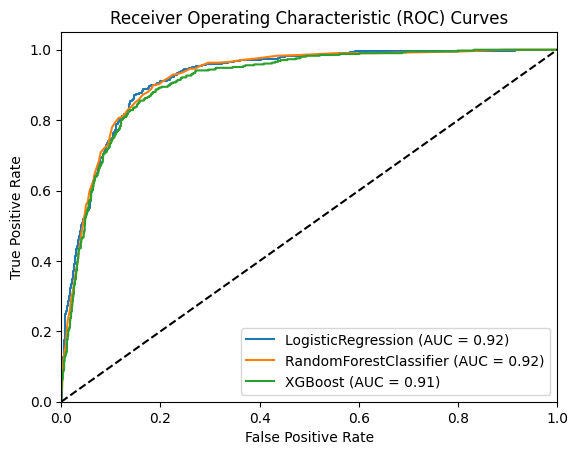

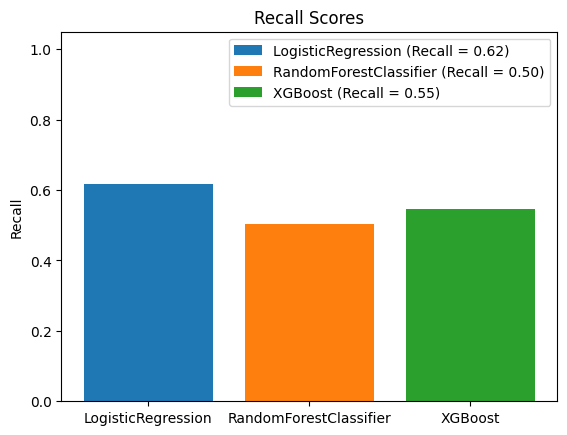

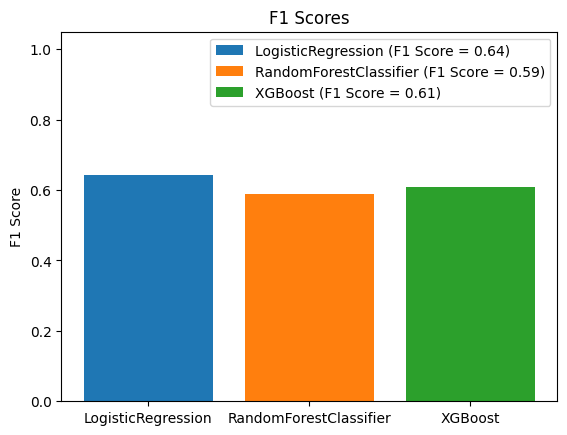

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

# Dicionário para armazenar o melhor modelo e a acurácia de teste para cada algoritmo
model_accuracy_info = {}

# Definir a grade de hiperparâmetros mais diversificada para cada modelo
# Definir a grade de hiperparâmetros para cada modelo
param_grid = {
    'LogisticRegression': {
        'C': [1.0],
        'random_state': [None]
    },
    'RandomForestClassifier': {
        'n_estimators': [100],
        'max_depth': [None],
        'random_state': [None]
    },
    'XGBoost': {
        'n_estimators': [100],
        'max_depth': [6],
        'random_state': [None]
    }
}

# Inicializar os modelos
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Função para ajustar hiperparâmetros manualmente
def tune_hyperparameters(model, params, X_train, y_train, X_val, y_val, weights=(0.5, 0.25, 0.25)):
    best_model = None
    best_params = {}
    best_score = 0  # Usar a pontuação ponderada
    for param in ParameterGrid(params):
        model.set_params(**param)
        model.fit(X_train, y_train)

        # Previsões de probabilidade e rótulos para calcular as métricas
        probabilities = model.predict_proba(X_val)[:, 1]
        pred_labels = model.predict(X_val)

        # Calcular as métricas
        auc = roc_auc_score(y_val, probabilities)
        recall = recall_score(y_val, pred_labels)
        f1 = f1_score(y_val, pred_labels)

        # Pontuação ponderada
        weighted_score = weights[0] * auc + weights[1] * recall + weights[2] * f1

        # Atualizar o melhor modelo se a pontuação ponderada melhorar
        if weighted_score > best_score:
            best_score = weighted_score
            best_model = model
            best_params = param

    return best_model, best_params

# Ajuste de hiperparâmetros e avaliação
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Ajustar hiperparâmetros
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train, y_train, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Prever e avaliar nos dados de teste usando AUC-ROC, acurácia, recall e F1 Score
    pred_test = model.predict_proba(X_test)
    pred_labels = model.predict(X_test)

    # Calcular métricas
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calcular AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_labels)  # Calcular acurácia
    recall_test = recall_score(y_test, pred_labels)  # Calcular Recall
    f1_test = f1_score(y_test, pred_labels)  # Calcular F1 Score

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V4.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Adicionar uma linha diagonal tracejada para o gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Recall para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['recall'], label=f'{name} (Recall = {info["recall"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('Recall Scores')
plt.ylabel('Recall')
plt.legend(loc="upper right")
plt.show()

# Gráfico de F1 Score para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['f1_score'], label=f'{name} (F1 Score = {info["f1_score"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('F1 Scores')
plt.ylabel('F1 Score')
plt.legend(loc="upper right")
plt.show()


## Interpretação do Modelo

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from joblib import load
from sklearn.linear_model import LogisticRegression

# Carregando o modelo de Regressão Logística
model = load("LogisticRegression_model_V4.joblib")

# Obtendo os coeficientes do modelo
coefficients = model.coef_[0]  # Para modelos binários, use [0] para pegar a primeira linha

# Criando um DataFrame para visualização
importances_df = pd.DataFrame({'Feature': df_with_qualifying.columns[:-1], 'Coefficient': coefficients})

# Ordenando o DataFrame pela magnitude dos coeficientes
importances_df['Importance'] = importances_df['Coefficient'].abs()  # Adicionando uma coluna de importância
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Exibindo as características mais importantes
print(importances_df.head(10))

# Mostrando os parâmetros do modelo
print(model.get_params(deep=True))


                                               Feature  Coefficient  \
2                                                 grid    -0.188032   
10   Constructor Average Position (This Year till l...    -0.051742   
9    Driver Average Position (This Year till last r...    -0.048094   
7                      Driver Avg position (Last Year)    -0.018215   
6    Constructor Top 3 Finish Percentage (This Year...     0.014844   
3           Driver Top 3 Finish Percentage (Last Year)     0.010287   
253                                    constructorId_6     0.008248   
269                                   constructorId_22     0.006735   
1                                                round     0.006649   
91                                         driverId_30     0.004199   

     Importance  
2      0.188032  
10     0.051742  
9      0.048094  
7      0.018215  
6      0.014844  
3      0.010287  
253    0.008248  
269    0.006735  
1      0.006649  
91     0.004199  
{'C': 1.0, 'class_we

Limiar Ótimo para o F1 Score: 0.352


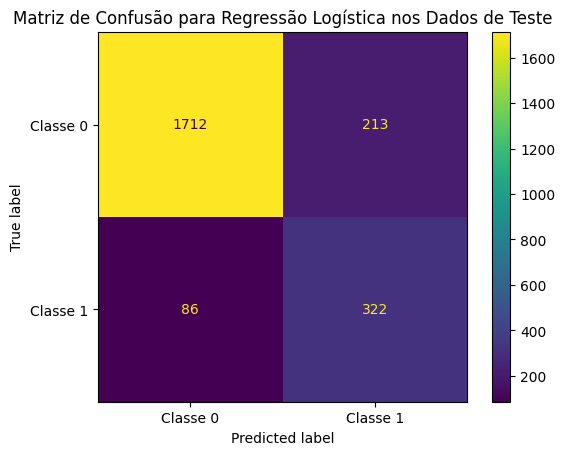

Acurácia do modelo: 0.872
F1 Score do modelo: 0.683


['LogisticRegression_model_V4_with_threshold.joblib']

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
from joblib import load, dump
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Carregar o modelo
model = load("LogisticRegression_model_V4.joblib")

# Prever as probabilidades nos dados de teste
data_prob = model.predict_proba(X_test)[:, 1]

# Calcular a curva de Precisão e Recall
precision, recall, thresholds = precision_recall_curve(y_test, data_prob)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)

# Encontrar o limiar ótimo
optimal_idx = np.nanargmax(f1_scores)  # Ignora valores NaN
optimal_threshold = thresholds[optimal_idx]
print(f"Limiar Ótimo para o F1 Score: {optimal_threshold:.3f}")

# Usar o novo limiar para fazer previsões de classes
pred_test = (data_prob >= optimal_threshold).astype(int)

# Mostrar a Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=['Classe 0', 'Classe 1'])
plt.title("Matriz de Confusão para Regressão Logística nos Dados de Teste")
plt.show()

# Calcular e exibir a acurácia
accuracy = accuracy_score(y_test, pred_test)
print(f"Acurácia do modelo: {accuracy:.3f}")

# Calcular e exibir o F1 Score
f1 = f1_score(y_test, pred_test)
print(f"F1 Score do modelo: {f1:.3f}")

# Criar um dicionário para guardar o modelo e o limiar
model_data = {
    "model": model,
    "threshold": optimal_threshold
}

# Salvar o dicionário
model_filename = "LogisticRegression_model_V4_with_threshold.joblib"
dump(model_data, model_filename)


In [ ]:
from joblib import load
import pandas as pd
from tabulate import tabulate  # Importa a biblioteca para formatação de tabelas

# Vamos trabalhar com os rounds que queremos
rounds = [21]
year = 2023

# Carregar o modelo de Regressão Logística e o limiar
model_data = load("LogisticRegression_model_V4_with_threshold.joblib")
model = model_data["model"]
optimal_threshold = model_data["threshold"]

# Criar um DataFrame vazio para armazenar as previsões
df_predict_all = pd.DataFrame()

# Loop pelos rounds desejados
for round in rounds:
    # Filtrar o DataFrame para o ano 2024 e o round atual
    df_current = df_with_qualifying[(df_with_qualifying["year"] == year) & (df_with_qualifying["round"] == round)]

    # Preparar a matriz de características para previsão
    X_current = df_current[df_current.columns.tolist()[:-1]].values

    # Calcular as probabilidades usando o modelo de Regressão Logística
    probabilities = model.predict_proba(X_current)

    # Aplicar o limiar para fazer previsões de classe
    pred_test = (probabilities[:, 1] >= optimal_threshold).astype(int)  # A segunda coluna é a probabilidade de terminar no Top 3

    # Selecionar colunas relevantes
    df_predict = df_final[["year", "round", "driverId", "constructorId", "grid", "Top 3 Finish"]]
    df_predict = df_predict[(df_predict["year"] == year) & (df_predict["round"] == round)]

    # Criar um dicionário para mapear 'driverId' para 'surname'
    driver_name_dict = pd.Series(drivers_df.surname.values, index=drivers_df.driverId).to_dict()

    # Substituir 'driverId' pelo sobrenome correspondente
    df_predict['driverId'] = df_predict['driverId'].map(driver_name_dict)

    # Adicionar as previsões ao DataFrame
    df_predict['Top_3_Finish_Prediction'] = pred_test

    # Criar um dicionário para mapear 'constructorId' para 'name'
    constructor_name_dict = pd.Series(constructors_df.name.values, index=constructors_df.constructorId).to_dict()

    # Substituir 'constructorId' pelo nome correspondente
    df_predict['constructorId'] = df_predict['constructorId'].map(constructor_name_dict)

    # Juntar as previsões em um único DataFrame
    df_predict_all = pd.concat([df_predict_all, df_predict], ignore_index=True)

# Imprimir o DataFrame com todas as previsões de forma legível
print(tabulate(df_predict_all, headers='keys', tablefmt='pretty', showindex=False))


+------+-------+------------+----------------+------+--------------+-------------------------+
| year | round |  driverId  | constructorId  | grid | Top 3 Finish | Top_3_Finish_Prediction |
+------+-------+------------+----------------+------+--------------+-------------------------+
| 2023 |  21   | Verstappen |    Red Bull    |  2   |      1       |            1            |
| 2023 |  21   |  Leclerc   |    Ferrari     |  1   |      1       |            1            |
| 2023 |  21   |   Pérez    |    Red Bull    |  11  |      1       |            0            |
| 2023 |  21   |    Ocon    | Alpine F1 Team |  16  |      0       |            0            |
| 2023 |  21   |   Stroll   |  Aston Martin  |  19  |      0       |            0            |
| 2023 |  21   |   Sainz    |    Ferrari     |  12  |      0       |            0            |
| 2023 |  21   |  Hamilton  |    Mercedes    |  10  |      0       |            0            |
| 2023 |  21   |  Russell   |    Mercedes    |  3 

## Tentando Oversampling



In [ ]:
df_with_qualifying = df_final_encoded

In [ ]:

train_df = df_with_qualifying[(df_with_qualifying["year"] >= 1983) & (df_with_qualifying["year"] <= 2008)]
val_df = df_with_qualifying[(df_with_qualifying["year"] >= 2009) & (df_with_qualifying["year"] <= 2016)]
test_df = df_with_qualifying[(df_with_qualifying["year"] >= 2017) & (df_with_qualifying["year"] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

print(X_train)
print(y_train)

[[1983 2 22 ... False False False]
 [1983 2 23 ... False False False]
 [1983 2 2 ... False False False]
 ...
 [2008 18 16 ... False False False]
 [2008 18 19 ... False False False]
 [2008 18 14 ... False False False]]
[1 1 1 ... 0 0 0]


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inicia o SMOTE
smote = SMOTE(random_state=42)

# Ajusta e aplica a transformação
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mostra a distribuição das classes
print("Antes de aumentar a amostra: ", Counter(y_train))
print("Depois de aumentar a amostra: ", Counter(y_train_resampled))

Antes de aumentar a amostra:  Counter({0: 6931, 1: 1150})
Depois de aumentar a amostra:  Counter({1: 6931, 0: 6931})


Model: LogisticRegression
Best parameters for LogisticRegression: {'C': 1.0, 'random_state': None}
Test AUC-ROC for LogisticRegression: 0.9216
Test Recall for LogisticRegression: 0.9240
Test F1 Score for LogisticRegression: 0.5989

Model: RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 100, 'random_state': None}
Test AUC-ROC for RandomForestClassifier: 0.9099
Test Recall for RandomForestClassifier: 0.7206
Test F1 Score for RandomForestClassifier: 0.6548

Model: XGBoost
Best parameters for XGBoost: {'max_depth': 6, 'n_estimators': 100, 'random_state': None}
Test AUC-ROC for XGBoost: 0.9098
Test Recall for XGBoost: 0.6250
Test F1 Score for XGBoost: 0.6456



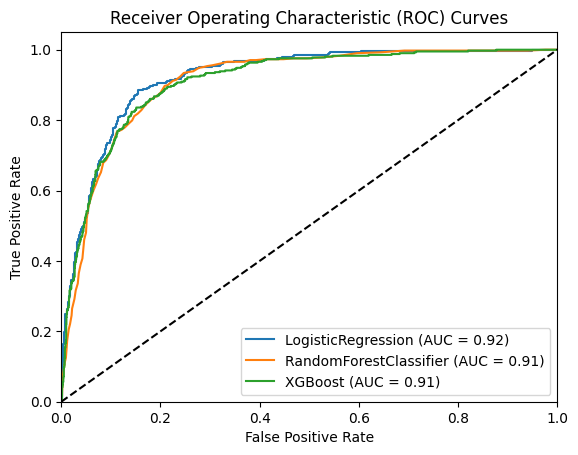

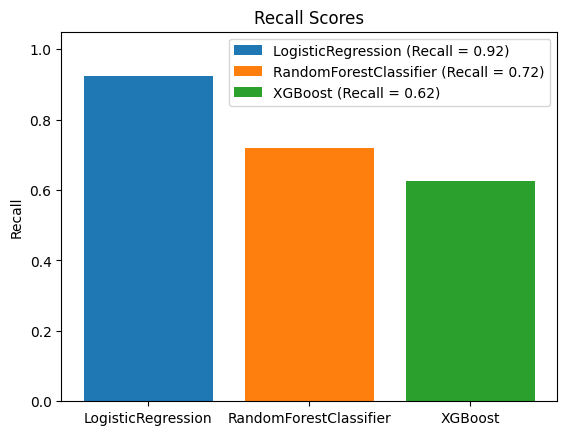

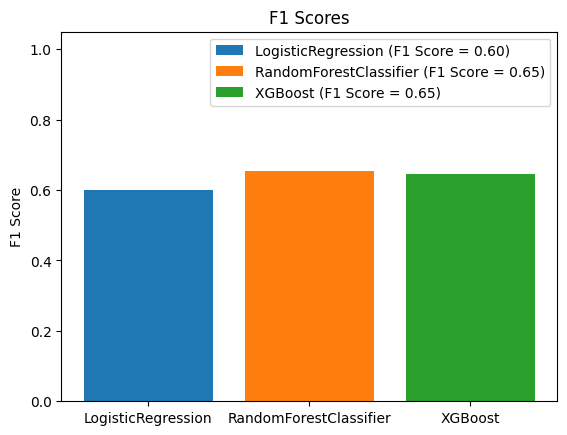

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb  # Importando o XGBoost
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

# Dicionário para armazenar o melhor modelo e a acurácia de teste para cada algoritmo
model_accuracy_info = {}

# Definir a grade de hiperparâmetros para cada modelo
param_grid = {
    'LogisticRegression': {
        'C': [1.0],
        'random_state': [None]
    },
    'RandomForestClassifier': {
        'n_estimators': [100],
        'max_depth': [None],
        'random_state': [None]
    },
    'XGBoost': {
        'n_estimators': [100],
        'max_depth': [6],
        'random_state': [None]
    }
}

# Inicializar os modelos
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='auc')
}

# Ignorar avisos de convergência e futuros
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

# Função para ajustar hiperparâmetros manualmente
def tune_hyperparameters(model, params, X_train_resampled, y_train_resampled, X_val, y_val):
    best_model = None
    best_params = {}
    best_auc = 0  # Usar AUC-ROC
    for param in ParameterGrid(params):
        model.set_params(**param)
        model.fit(X_train_resampled, y_train_resampled)
        probabilities = model.predict_proba(X_val)
        auc = roc_auc_score(y_val, probabilities[:, 1])  # Calcular AUC-ROC
        if auc > best_auc:
            best_auc = auc
            best_model = model
            best_params = param
    return best_model, best_params

# Ajuste de hiperparâmetros e avaliação
for name, model in models.items():
    print(f"Model: {name}")
    if name in param_grid:
        # Ajustar hiperparâmetros
        best_model, best_params = tune_hyperparameters(model, param_grid[name], X_train_resampled, y_train_resampled, X_val, y_val)
        print(f"Best parameters for {name}: {best_params}")
        model = best_model

    # Prever e avaliar nos dados de teste usando AUC-ROC, acurácia, recall e F1 Score
    pred_test = model.predict_proba(X_test)
    pred_labels = model.predict(X_test)

    # Calcular métricas
    auc_test = roc_auc_score(y_test, pred_test[:, 1])  # Calcular AUC-ROC
    accuracy_test = accuracy_score(y_test, pred_labels)  # Calcular acurácia
    recall_test = recall_score(y_test, pred_labels)  # Calcular Recall
    f1_test = f1_score(y_test, pred_labels)  # Calcular F1 Score

    print(f"Test AUC-ROC for {name}: {auc_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}\n")

    model_filename = f"{name}_model_V5.joblib"
    joblib.dump(model, model_filename)
    model_accuracy_info[name] = {
        'model': model_filename,
        'auc_roc': auc_test,
        'accuracy': accuracy_test,
        'recall': recall_test,
        'f1_score': f1_test
    }

    # Calcular a curva ROC e o AUC para cada modelo
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)

    # Traçar a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Adicionar uma linha diagonal tracejada para o gráfico ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Recall para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['recall'], label=f'{name} (Recall = {info["recall"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('Recall Scores')
plt.ylabel('Recall')
plt.legend(loc="upper right")
plt.show()

# Gráfico de F1 Score para cada modelo
plt.figure()
for name, info in model_accuracy_info.items():
    plt.bar(name, info['f1_score'], label=f'{name} (F1 Score = {info["f1_score"]:.2f})')

plt.ylim([0.0, 1.05])
plt.title('F1 Scores')
plt.ylabel('F1 Score')
plt.legend(loc="upper right")
plt.show()


##Predições

In [ ]:
from joblib import load
import pandas as pd
from tabulate import tabulate  # Importa a biblioteca para formatação de tabelas

# Vamos trabalhar com os rounds que queremos
rounds = [20]
year = 2021

# Carregar o modelo de Regressão Logística e o limiar
model_data = load("LogisticRegression_model_V5.joblib")


# Criar um DataFrame vazio para armazenar as previsões
df_predict_all = pd.DataFrame()

# Loop pelos rounds desejados
for round in rounds:
    # Filtrar o DataFrame para o ano 2024 e o round atual
    df_current = df_with_qualifying[(df_with_qualifying["year"] == year) & (df_with_qualifying["round"] == round)]

    # Preparar a matriz de características para previsão
    X_current = df_current[df_current.columns.tolist()[:-1]].values

    # Calcular as probabilidades usando o modelo de Regressão Logística
    probabilities = model.predict_proba(X_current)

    # Aplicar o limiar para fazer previsões de classe
    pred_test = (probabilities[:, 1] >= optimal_threshold).astype(int)  # A segunda coluna é a probabilidade de terminar no Top 3

    # Selecionar colunas relevantes
    df_predict = df_final[["year", "round", "driverId", "constructorId", "grid", "Top 3 Finish"]]
    df_predict = df_predict[(df_predict["year"] == year) & (df_predict["round"] == round)]

    # Criar um dicionário para mapear 'driverId' para 'surname'
    driver_name_dict = pd.Series(drivers_df.surname.values, index=drivers_df.driverId).to_dict()

    # Substituir 'driverId' pelo sobrenome correspondente
    df_predict['driverId'] = df_predict['driverId'].map(driver_name_dict)

    # Adicionar as previsões ao DataFrame
    df_predict['Top_3_Finish_Prediction'] = pred_test

    # Criar um dicionário para mapear 'constructorId' para 'name'
    constructor_name_dict = pd.Series(constructors_df.name.values, index=constructors_df.constructorId).to_dict()

    # Substituir 'constructorId' pelo nome correspondente
    df_predict['constructorId'] = df_predict['constructorId'].map(constructor_name_dict)

    # Juntar as previsões em um único DataFrame
    df_predict_all = pd.concat([df_predict_all, df_predict], ignore_index=True)

# Imprimir o DataFrame com todas as previsões de forma legível
print(tabulate(df_predict_all, headers='keys', tablefmt='pretty', showindex=False))

+------+-------+------------+----------------+------+--------------+-------------------------+
| year | round |  driverId  | constructorId  | grid | Top 3 Finish | Top_3_Finish_Prediction |
+------+-------+------------+----------------+------+--------------+-------------------------+
| 2021 |  20   |  Hamilton  |    Mercedes    |  1   |      1       |            1            |
| 2021 |  20   | Verstappen |    Red Bull    |  7   |      1       |            0            |
| 2021 |  20   |   Pérez    |    Red Bull    |  11  |      0       |            0            |
| 2021 |  20   |    Ocon    | Alpine F1 Team |  9   |      0       |            0            |
| 2021 |  20   |   Stroll   |  Aston Martin  |  12  |      0       |            0            |
| 2021 |  20   |   Sainz    |    Ferrari     |  5   |      0       |            0            |
| 2021 |  20   |  Leclerc   |    Ferrari     |  13  |      0       |            0            |
| 2021 |  20   |   Norris   |    McLaren     |  4 

In [ ]:
from joblib import load
import pandas as pd
from tabulate import tabulate  # Importa a biblioteca para formatação de tabelas

# Vamos trabalhar com os rounds que queremos
rounds = [10]
year = 2022

# Carregar o modelo de Regressão Logística
model = load("RandomForestClassifier_model_V5.joblib")

# Criar um DataFrame vazio para armazenar as previsões
df_predict_all = pd.DataFrame()

# Loop pelos rounds desejados
for round in rounds:
    # Filtrar o DataFrame para o ano e o round atual
    df_current = df_with_qualifying[(df_with_qualifying["year"] == year) & (df_with_qualifying["round"] == round)]

    # Preparar a matriz de características para previsão
    X_current = df_current[df_current.columns.tolist()[:-1]].values

    # Fazer previsões de probabilidade
    prob_test = model.predict_proba(X_current)[:, 1]  # Obtenha a probabilidade da classe positiva (top 3)

    # Selecionar colunas relevantes
    df_predict = df_final[["year", "round", "driverId", "constructorId", "grid", "Top 3 Finish"]]
    df_predict = df_predict[(df_predict["year"] == year) & (df_predict["round"] == round)]

    # Criar um dicionário para mapear 'driverId' para 'surname'
    driver_name_dict = pd.Series(drivers_df.surname.values, index=drivers_df.driverId).to_dict()

    # Substituir 'driverId' pelo sobrenome correspondente
    df_predict['driverId'] = df_predict['driverId'].map(driver_name_dict)

    # Adicionar as previsões ao DataFrame
    df_predict['Top_3_Finish_Prediction'] = prob_test

    # Classificar pela probabilidade em ordem decrescente e marcar apenas os 3 primeiros com 1
    df_predict = df_predict.sort_values(by='Top_3_Finish_Prediction', ascending=False).reset_index(drop=True)
    df_predict['Top_3_Finish_Prediction'] = [1 if i < 3 else 0 for i in range(len(df_predict))]

    # Criar um dicionário para mapear 'constructorId' para 'name'
    constructor_name_dict = pd.Series(constructors_df.name.values, index=constructors_df.constructorId).to_dict()

    # Substituir 'constructorId' pelo nome correspondente
    df_predict['constructorId'] = df_predict['constructorId'].map(constructor_name_dict)

    # Juntar as previsões em um único DataFrame
    df_predict_all = pd.concat([df_predict_all, df_predict], ignore_index=True)

# Imprimir o DataFrame com todas as previsões de forma legível
print(tabulate(df_predict_all, headers='keys', tablefmt='pretty', showindex=False))


+------+-------+------------+----------------+------+--------------+-------------------------+
| year | round |  driverId  | constructorId  | grid | Top 3 Finish | Top_3_Finish_Prediction |
+------+-------+------------+----------------+------+--------------+-------------------------+
| 2022 |  10   |   Sainz    |    Ferrari     |  1   |      1       |            1            |
| 2022 |  10   | Verstappen |    Red Bull    |  2   |      0       |            1            |
| 2022 |  10   |   Pérez    |    Red Bull    |  4   |      1       |            1            |
| 2022 |  10   |  Hamilton  |    Mercedes    |  5   |      1       |            0            |
| 2022 |  10   |  Leclerc   |    Ferrari     |  3   |      0       |            0            |
| 2022 |  10   |   Norris   |    McLaren     |  6   |      0       |            0            |
| 2022 |  10   |  Russell   |    Mercedes    |  8   |      0       |            0            |
| 2022 |  10   |   Bottas   |   Alfa Romeo   |  12